In [1]:
import pandas as pd

df = pd.read_csv('data_with_features')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (11,24,35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
df[df['home_town'] == 'Воронеж']['city_id']

1006     1009407.0
1690          42.0
1899          42.0
1900          42.0
1904          42.0
           ...    
15867         42.0
15876         42.0
15885    1024211.0
15889         42.0
15890         42.0
Name: city_id, Length: 169, dtype: float64

In [3]:
df = df.drop(['deactivated', 'is_closed','verified','ours'], axis = 1)

In [4]:
df.iloc[:,:34].columns

Index(['id', 'first_name', 'last_name', 'sex', 'photo_400_orig', 'domain',
       'bdate', 'last_seen', 'maiden_name', 'city_id', 'city_title',
       'country_id', 'home_town', 'education', 'occupation', 'universities',
       'schools', 'career', 'social', 'has_photo', 'phone', 'site', 'status',
       'followers_count', 'relatives', 'relation', 'personal', 'about',
       'universities_faculty_name', 'ПредмОбл Итог', 'Направление',
       'user_items', 'publics', 'groups'],
      dtype='object')

In [5]:
cdf = df.iloc[:,6:34]

cdf = cdf[cdf['Направление'] != 'другое']

In [6]:
cdf.columns

Index(['bdate', 'last_seen', 'maiden_name', 'city_id', 'city_title',
       'country_id', 'home_town', 'education', 'occupation', 'universities',
       'schools', 'career', 'social', 'has_photo', 'phone', 'site', 'status',
       'followers_count', 'relatives', 'relation', 'personal', 'about',
       'universities_faculty_name', 'ПредмОбл Итог', 'Направление',
       'user_items', 'publics', 'groups'],
      dtype='object')

In [7]:
cdf['Направление'].value_counts()

гуманитарные    8448
точные          5307
естественные    3716
Name: Направление, dtype: int64

In [8]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17471 entries, 0 to 17679
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   bdate                      16530 non-null  object 
 1   last_seen                  17471 non-null  int64  
 2   maiden_name                126 non-null    object 
 3   city_id                    14993 non-null  float64
 4   city_title                 14992 non-null  object 
 5   country_id                 16514 non-null  float64
 6   home_town                  11502 non-null  object 
 7   education                  17382 non-null  object 
 8   occupation                 17268 non-null  object 
 9   universities               17471 non-null  object 
 10  schools                    11767 non-null  object 
 11  career                     1487 non-null   object 
 12  social                     4944 non-null   object 
 13  has_photo                  17471 non-null  flo

# Data

In [9]:
cdf['bdate'].unique()

array(['10.10.2001', '26.май', '14.авг', ..., '01.09.2002', '31.07.2002',
       '20.06.2002'], dtype=object)

In [10]:
import numpy as np

def addday(row):
    if type(row['bdate']) is str:
        dot = row['bdate'].find('.')
        return row['bdate'][:dot]
    else:
        return np.NaN

        
cdf['day'] = cdf.apply(lambda row: addday(row), axis = 1)  

In [11]:
def addmonth(row):
    if type(row['bdate']) is str:
        if row['bdate'].count('.') == 2:
            dot = row['bdate'].find('.')
            rdot = row['bdate'].rfind('.')
            return int(row['bdate'][dot+1:rdot])
        else:
            dot = row['bdate'].find('.')
            if row['bdate'][dot+1:] == 'янв':
                return 1
            if row['bdate'][dot+1:] == 'фев':
                return 2
            if row['bdate'][dot+1:] == 'мар':
                return 3
            if row['bdate'][dot+1:] == 'апр':
                return 4
            if row['bdate'][dot+1:] == 'май':
                return 5
            if row['bdate'][dot+1:] == 'июн':
                return 6
            if row['bdate'][dot+1:] == 'июл':
                return 7
            if row['bdate'][dot+1:] == 'авг':
                return 8
            if row['bdate'][dot+1:] == 'сен':
                return 9
            if row['bdate'][dot+1:] == 'окт':
                return 10
            if row['bdate'][dot+1:] == 'ноя':
                return 11
            if row['bdate'][dot+1:] == 'дек':
                return 12
    else:
        return np.NaN

        
cdf['month'] = cdf.apply(lambda row: addmonth(row), axis = 1)  

In [12]:
cdf['month'].unique()

array([10.,  5.,  8.,  9., 11., nan,  1.,  3.,  2.,  7.,  6., 12.,  4.])

Matplotlib is building the font cache; this may take a moment.
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


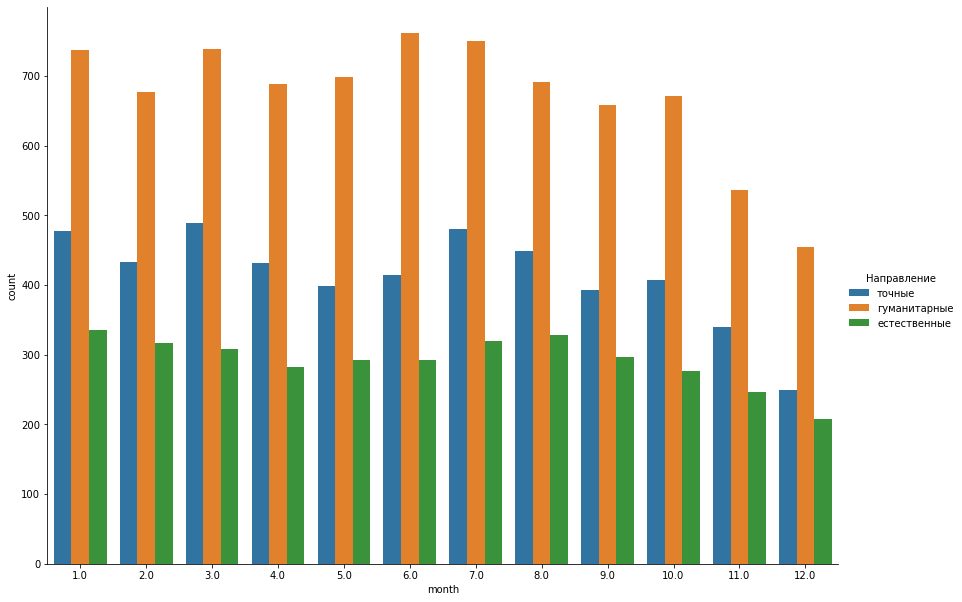

In [13]:
import seaborn as sns
import numpy as np

sns.factorplot('month',data=cdf,hue='Направление',kind='count',  height=8.27, aspect=11.7/8.27)

None

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


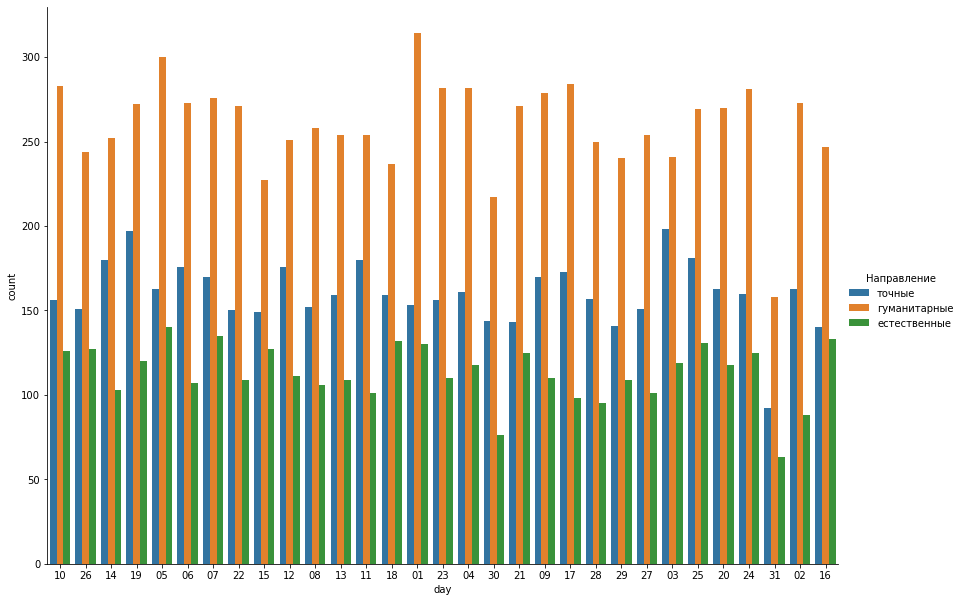

In [14]:

sns.factorplot('day',data=cdf,hue='Направление',kind='count', height=8.27, aspect=11.7/8.27)


None

# Maiden name

In [15]:
def addmn(row):
    if type(row['maiden_name']) is str:
        print(row['maiden_name'])
        return 1
    else:
        return 0

        
cdf['m_name'] = cdf.apply(lambda row: addmn(row), axis = 1)  

Макарьина
Шайдуллаева
Раилевна
Психологи
Мьюзер-Во-Плоти
Лунева-Власьева
Ksyusha
Герасименко
Акентьева
Моя
Кардашьян
Ля
Иванова
Нет
Соколова
Пасишниченко
Клешняк
Kravchenko
Олеговна
Ирэн-Джейн
Каракульщикович
Парфенюк
Черевко
Памптрековна
Уля
Никитишна
Щербакова
Мальке
Маркова
Филиппова
Фотограф
Костюченко
Гуковна
Псена
Aberle
Гаевская
Кулагина
Воронина
Жижина
Иванова
Сильвер
Гофман
Дружинина
Фотограф
Щетинина
Щетинина
Великанова
Аватария
Маша
Дичкова
Бром
Омукова
Платонова
Движкова
Завацкая
Павлова
Прусакова
Петренко
Фит
Аватария
Горина
Дорохина
Кастрюля
Маркелова
Пока
Визажист
Столярова
Savina
Нет
Гайкалова
Принцесса
Приходько
Алексеева
Лапшина
Шишкова
Алпатова
Дмитриевна
Клюйкова
Свердлова
Калинина
Насонова
Nikakaya
Исаева
Киця
Poproschschschll
Кувичко
Shepard
Ефимова
Видющенко
Дугобоенкова
I
Муртазалиева
Простая-Душа
Хаха
Бездушная
Пичугина
Созонова
Дьявол
Лена
Ванян
Мартьянова
Рус
Fffff
Билалова
Шугаринг
Менеджеры
Ахмадова
Щербак
Рукожоп
Винокурова
Dinesyuk
Криничная
Цой
Итальева


In [16]:
cdf['m_name'].value_counts()

0    17345
1      126
Name: m_name, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


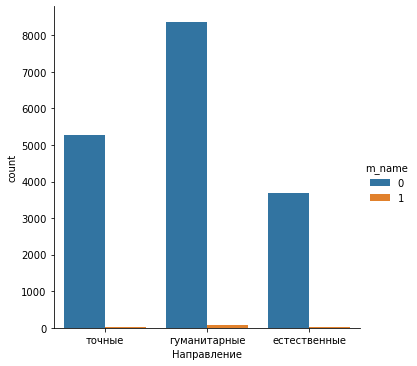

In [17]:

sns.factorplot('Направление',data=cdf,hue='m_name',kind='count')

# City

In [18]:
cdf['city_id'].nunique()

1110

In [19]:
fcity = dict()
for elem in cdf['city_id'].unique():
    fcity[elem] = 0
    
for elem in cdf['city_id'].unique():
    num = cdf[cdf['city_id'] == elem].shape[0]
    fcity[elem] = num

In [20]:
def citythreshold(freq, threshold = 30):
    lst = []
    for elem in freq.items():
        num = elem[1]
        if num >= threshold:
            lst.append(elem[0])
    return lst

In [21]:
arr = citythreshold(fcity, 90)

In [22]:
len(arr)

37

In [23]:
def addcity(row, arr):
    if row['city_id'] in arr:
        return row['city_id']
    else:
        return 0

        
cdf['city_id'] = cdf.apply(lambda row: addcity(row, arr), axis = 1)  

In [24]:
cdf['city_id'].unique()

array([  1.,   0., 119.,  99., 144.,  25.,   2.,  49.,  73., 104., 153.,
       110.,  37.,  75., 141., 169.,  72.,  60.,  95., 123.,  10.,  42.,
       151., 627., 106., 158.,  61., 147.,  26., 109.,  57.,  55., 125.,
       146.,  64., 149.,  78., 124.])

In [25]:
cdf['Направление'].value_counts()

гуманитарные    8448
точные          5307
естественные    3716
Name: Направление, dtype: int64

[1.0, 119.0, 99.0]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[144.0, 25.0, 2.0]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[49.0, 73.0, 104.0]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[153.0, 110.0, 37.0]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[75.0, 141.0, 169.0]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[72.0, 60.0, 95.0]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[123.0, 10.0, 42.0]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[151.0, 627.0, 106.0]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[158.0, 61.0, 147.0]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[26.0, 109.0, 57.0]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[55.0, 125.0, 146.0]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[64.0, 149.0, 78.0]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[124.0]


IndexError: list index out of range

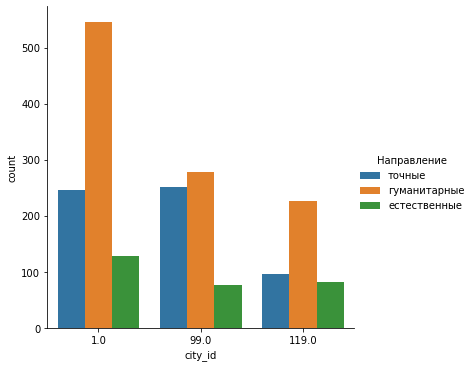

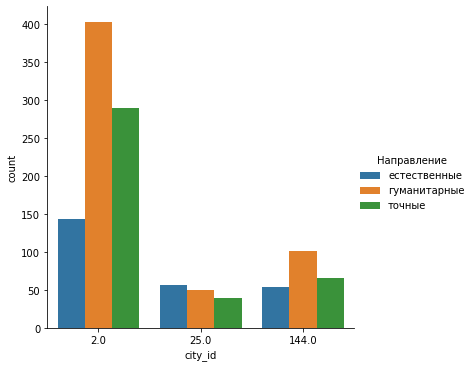

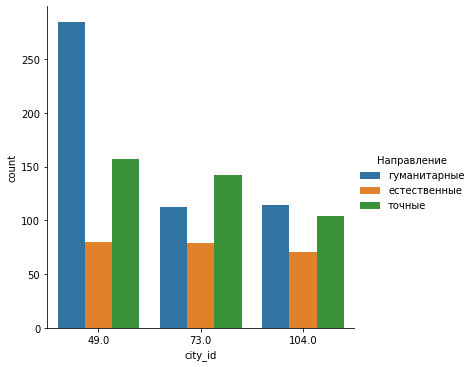

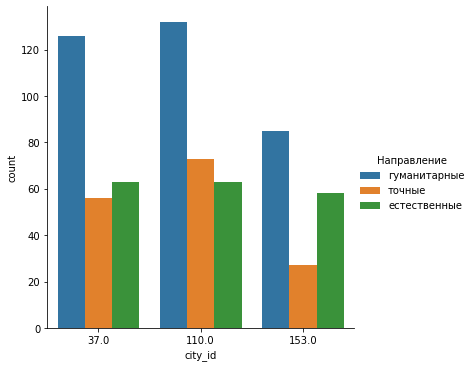

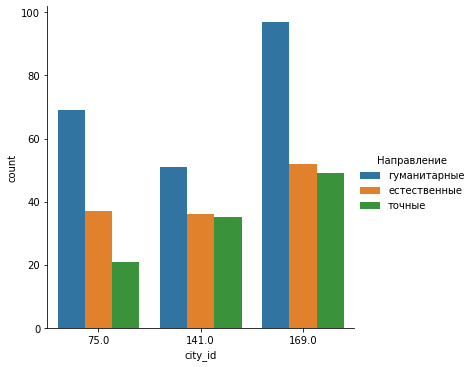

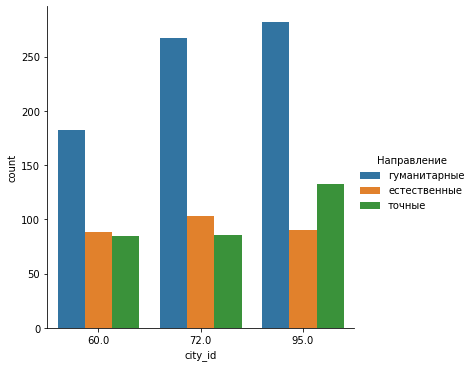

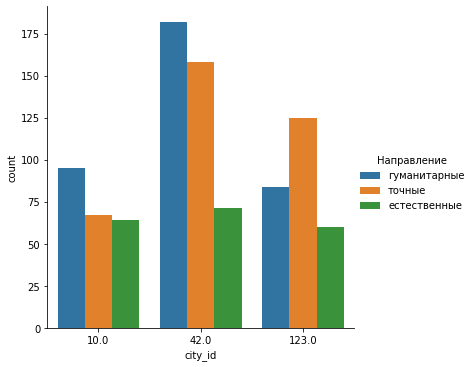

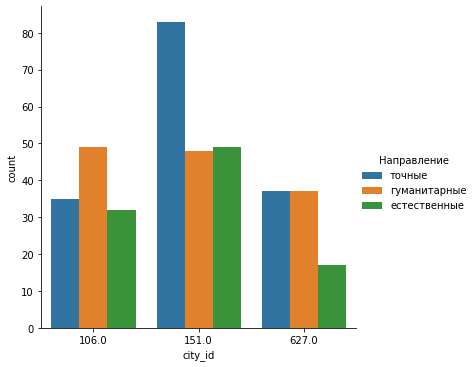

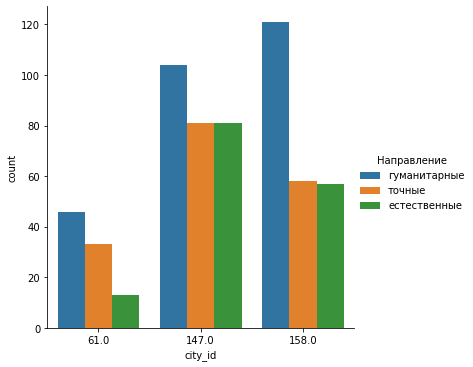

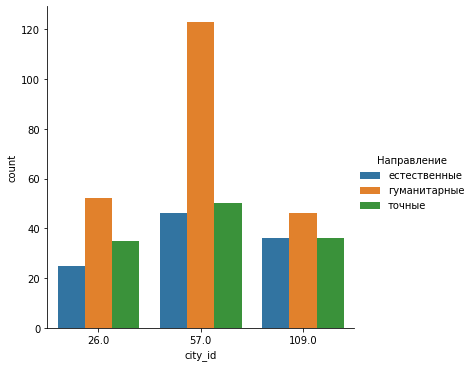

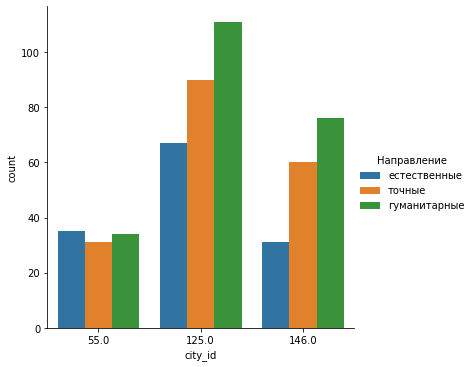

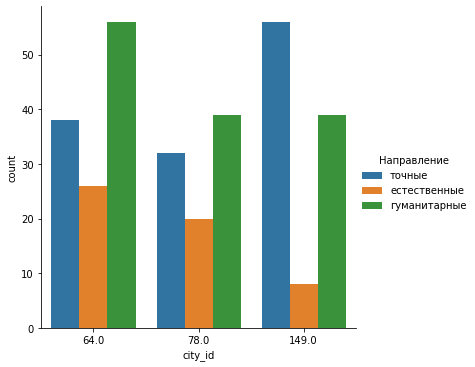

In [26]:
for i in range(0,len(arr),3):
    sp = arr[i:i+3]
    print(sp)
    data = cdf[(cdf['city_id'] == sp[0]) | (cdf['city_id'] == sp[1]) | (cdf['city_id'] == sp[2])]
    sns.factorplot('city_id',data=data,hue='Направление',kind='count')
    None

In [27]:
fcity[49]

522

# Country

In [28]:
cdf['country_id'].value_counts()

1.0      16272
2.0         77
4.0         44
9.0         26
3.0         14
65.0         9
226.0        8
229.0        7
6.0          4
88.0         3
7.0          3
8.0          3
10.0         3
5.0          3
49.0         3
19.0         2
97.0         2
142.0        2
224.0        2
20.0         2
215.0        2
108.0        1
16.0         1
152.0        1
89.0         1
221.0        1
233.0        1
121.0        1
25.0         1
201.0        1
43.0         1
165.0        1
161.0        1
61.0         1
55.0         1
173.0        1
115.0        1
235.0        1
145.0        1
144.0        1
14.0         1
83.0         1
98.0         1
230.0        1
Name: country_id, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


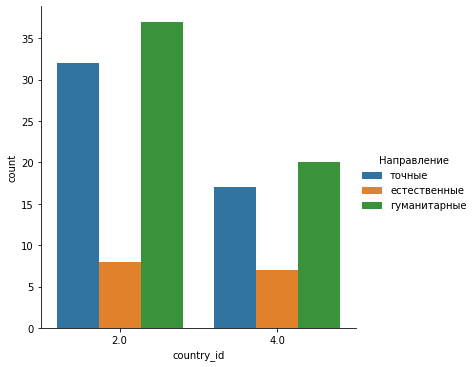

In [29]:
data = cdf[(cdf['country_id'] == 2) | (cdf['country_id'] == 4)]
sns.factorplot('country_id',data=data,hue='Направление',kind='count')
None

In [30]:
def addcnt(row, arr):
    if row['country_id'] == 2 or row['country_id'] == 4:
        return row['country_id']
    else:
        return 0

        
cdf['country_id'] = cdf.apply(lambda row: addcnt(row, arr), axis = 1)  

In [31]:
cdf['country_id'].value_counts()

0.0    17350
2.0       77
4.0       44
Name: country_id, dtype: int64

In [32]:
cdf.columns

Index(['bdate', 'last_seen', 'maiden_name', 'city_id', 'city_title',
       'country_id', 'home_town', 'education', 'occupation', 'universities',
       'schools', 'career', 'social', 'has_photo', 'phone', 'site', 'status',
       'followers_count', 'relatives', 'relation', 'personal', 'about',
       'universities_faculty_name', 'ПредмОбл Итог', 'Направление',
       'user_items', 'publics', 'groups', 'day', 'month', 'm_name'],
      dtype='object')

# Hometown

In [33]:
ncity = dict()
for elem in cdf['home_town'].unique():
    ncity[elem] = 0
    
for elem in cdf['home_town'].unique():
    num = cdf[cdf['home_town'] == elem].shape[0]
    ncity[elem] = num

In [34]:
def homethreshold(freq, threshold = 30):
    lst = []
    for elem in freq.items():
        num = elem[1]
        if num >= threshold:
            lst.append(elem[0])
    return lst

In [35]:
cdf['home_town'].value_counts()

Новосибирск        265
Москва             231
Нижний Новгород    229
Екатеринбург       218
Омск               182
                  ... 
Новотроицкая         1
троицк               1
Brooklyn             1
Красноперекопск      1
Шыгырданы            1
Name: home_town, Length: 2489, dtype: int64

In [36]:
arr = homethreshold(ncity, 90)

In [37]:
arr

['Краснодар',
 'Новосибирск',
 'Саратов',
 'Москва',
 'Уфа',
 'Екатеринбург',
 'Казань',
 'Самара',
 'Иркутск',
 'Нижний Новгород',
 'Омск',
 'Волгоград',
 'Ярославль',
 'Воронеж',
 'Ростов-на-Дону',
 'Красноярск',
 'Владивосток',
 'Томск',
 'Пермь',
 'Челябинск',
 'Пенза',
 'Тула',
 'Тюмень']

['Краснодар', 'Новосибирск', 'Саратов']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


['Москва', 'Уфа', 'Екатеринбург']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


['Казань', 'Самара', 'Иркутск']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


['Нижний Новгород', 'Омск', 'Волгоград']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


['Ярославль', 'Воронеж', 'Ростов-на-Дону']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


['Красноярск', 'Владивосток', 'Томск']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


['Пермь', 'Челябинск', 'Пенза']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


['Тула', 'Тюмень']


IndexError: list index out of range

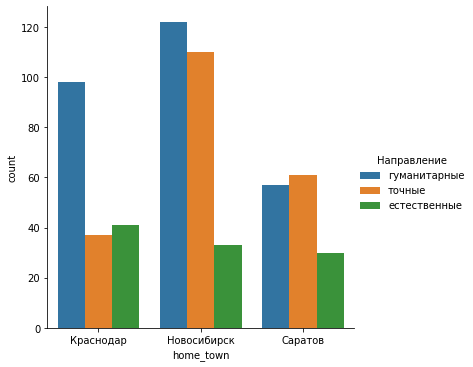

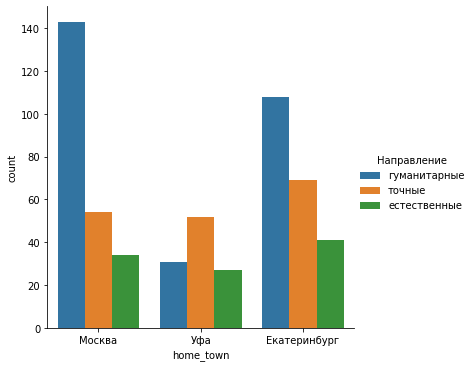

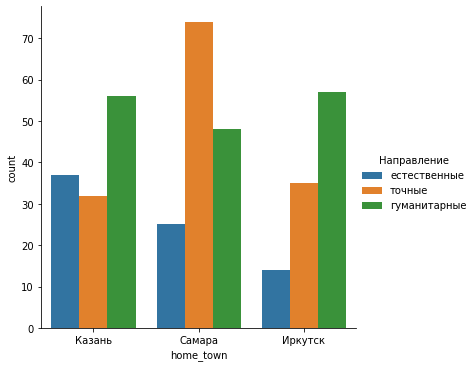

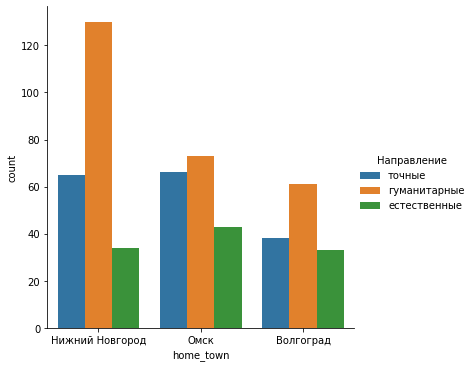

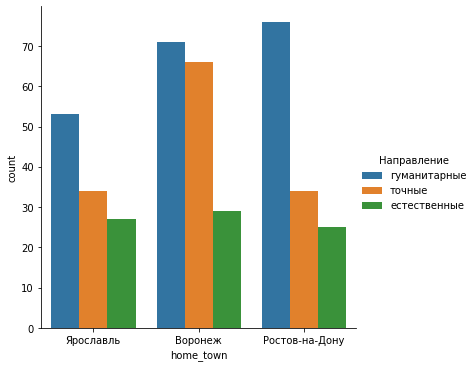

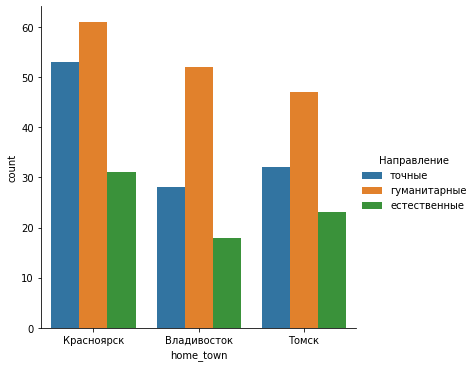

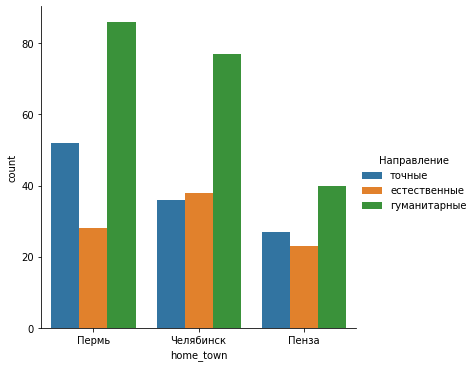

In [38]:
for i in range(0,len(arr),3):
    sp = arr[i:i+3]
    print(sp)
    data = cdf[(cdf['home_town'] == sp[0]) | (cdf['home_town'] == sp[1]) | (cdf['home_town'] == sp[2])]
    sns.factorplot('home_town',data=data,hue='Направление',kind='count')
    None

In [39]:
def addchange(row, arr):
    if row['home_town'] == row['city_title']:
        return 1
    else:
        return 0

        
cdf['changecity'] = cdf.apply(lambda row: addchange(row, arr), axis = 1) 

In [40]:
def addhome(row, arr):
    
    if row['home_town'] in arr:
        return row['home_town']
    else:
        return 0

        
cdf['home_town'] = cdf.apply(lambda row: addhome(row, arr), axis = 1) 

In [41]:
cdf[cdf['home_town'] == cdf['city_title']]

,bdate,last_seen,maiden_name,city_id,city_title,country_id,home_town,education,occupation,universities,...,universities_faculty_name,ПредмОбл Итог,Направление,user_items,publics,groups,day,month,m_name,changecity
158,17.03.2001,1580570758,NaN,99.0,Новосибирск,0.0,Новосибирск,"{""faculty"": ""6389"", ""university"": ""675""}","{""id"": 675, ""name"": ""СИУ РАНХиГС (СибАГС)"", ""t...","[{""id"": 675, ""city"": 99, ""name"": ""СИУ РАНХиГС ...",...,Юридический факультет,юриспруденция,гуманитарные,"{235115929,118862470}","{1415705,66598975,98647548,81828545,145520510,...","{81828545,66598975,147465007,145520510,1415705...",17,3.0,0,1
248,07.мар,1580556982,NaN,99.0,Новосибирск,0.0,Новосибирск,"{""faculty"": ""5844"", ""university"": ""677""}","{""id"": 677, ""name"": ""СГУПС"", ""type"": ""universi...","[{""id"": 677, ""city"": 99, ""name"": ""СГУПС"", ""cou...",...,Факультет «Мировая экономика и право»,экономика/финансы,гуманитарные,{},"{149467658,49439086,144181254,43776215,1308659...","{149467658,49439086,85608120,165604219,1441812...",07,3.0,0,1
626,27.фев,1580546220,NaN,151.0,Уфа,0.0,Уфа,"{""faculty"": ""15408"", ""university"": ""879"", ""edu...","{""id"": 879, ""name"": ""БашГУ"", ""type"": ""universi...","[{""id"": 879, ""city"": 151, ""name"": ""БашГУ"", ""ch...",...,Факультет математики и информационных технологий,математика,точные,"{118862470,45185031}","{49439086,129368275,45082313,37466869,66893952...","{49439086,129368275,45082313,104038502,1690532...",27,2.0,0,1
628,25.май,1580494508,NaN,151.0,Уфа,0.0,Уфа,"{""faculty"": ""2766"", ""university"": ""527""}","{""id"": 527, ""name"": ""КФУ (бывш. КГУ им. Ульяно...","[{""id"": 527, ""city"": 151, ""name"": ""КФУ (бывш. ...",...,Институт управления,менеджмент/управление,гуманитарные,"{166138000,434814714,55325758,395539841,133796...","{162888726,131869539,135849274,170285505,14523...","{162888726,87440529,145233167,126025514,131869...",25,5.0,0,1
633,22.01.2001,1580557953,NaN,151.0,Уфа,0.0,Уфа,"{""faculty"": ""21779"", ""university"": ""876"", ""edu...","{""id"": 876, ""name"": ""БГАУ"", ""type"": ""university""}","[{""id"": 876, ""city"": 151, ""name"": ""БГАУ\r\n"", ...",...,Факультет биотехнологий и ветеринарной медицины,биология/медицина,естественные,{},"{57882883,1112285,148569250,48558367,56106344,...","{48558367,1112285,148569250,151103485,13936203...",22,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17510,NaN,1580553829,NaN,147.0,Тюмень,0.0,Тюмень,"{""faculty"": ""149765"", ""university"": ""73758""}","{""id"": 73758, ""name"": ""ТюмГМУ (ТюмГМА)"", ""type...","[{""id"": 73758, ""city"": 147, ""name"": ""ТюмГМУ (Т...",...,Лечебный факультет,биология/медицина,естественные,NaN,"43696984,114038183,136699221,92397287,66678575...","68010126,124856749,130693054",NaN,NaN,0,1
17511,26.авг,1580283194,NaN,147.0,Тюмень,0.0,Тюмень,"{""faculty"": ""109263"", ""university"": ""4090"", ""e...","{""id"": 4090, ""name"": ""ТИПК МВД России (бывш. Т...","[{""id"": 4090, ""city"": 147, ""name"": ""ТИПК МВД Р...",...,Юриспруденция,юриспруденция,гуманитарные,NaN,"73756584,43776215,52537634,148693470,126189285...",NaN,26,8.0,0,1
17568,12.04.2002,1580663640,NaN,95.0,Нижний Новгород,0.0,Нижний Новгород,"{""faculty"": ""2977"", ""university"": ""652"", ""educ...","{""id"": 652, ""name"": ""НГТУ им. Р. Е. Алексеева""...","[{""id"": 652, ""city"": 95, ""name"": ""НГТУ им. Р. ...",...,Институт транспортных систем,техника и технологии,точные,NaN,"71729358,67580761,56106344,30179569,171698672,...",NaN,12,4.0,0,1
17631,29.08.2002,1580504206,NaN,1.0,Москва,0.0,Москва,"{""faculty"": ""1663"", ""university"": ""242""}","{""id"": 242, ""name"": ""МГЛУ (бывш. МГПИИЯ им. Мо...","[{""id"": 242, ""city"": 1, ""name"": ""МГЛУ (бывш. М...",...,Переводческий факультет,иностранные языки,гуманитарные,NaN,"173600781,177118985,39566948,158807318,1729310...",NaN,29,8.0,0,1


In [42]:
cdf['home_town'].value_counts()

0                  14036
Новосибирск          265
Москва               231
Нижний Новгород      229
Екатеринбург         218
Омск                 182
Краснодар            176
Пермь                166
Воронеж              166
Челябинск            151
Саратов              148
Самара               147
Красноярск           145
Ростов-на-Дону       135
Волгоград            132
Казань               125
Ярославль            114
Уфа                  110
Иркутск              106
Томск                102
Тюмень               102
Владивосток           98
Тула                  97
Пенза                 90
Name: home_town, dtype: int64

# Education

In [43]:
cdf['education'].value_counts()

{"faculty": "20", "university": "2"}                                                       57
{"faculty": "1991", "university": "653"}                                                   40
{"faculty": "8738", "university": "3415"}                                                  39
{"faculty": "5721", "university": "415"}                                                   37
{"faculty": "2160634", "university": "527"}                                                37
                                                                                           ..
{"faculty": "2173844", "university": "477", "education_status": "Студентка (бакалавр)"}     1
{"faculty": "1071", "university": "254"}                                                    1
{"faculty": "186551", "graduation": "2017", "university": "659"}                            1
{"faculty": "2836", "university": "889", "education_status": "Студент (специалист)"}        1
{"faculty": "462271", "university": "35249"}                

# Occupation

In [44]:
cdf['occupation'].value_counts()

{"id": 2, "name": "МГУ", "type": "university"}                                                   388
{"id": 527, "name": "КФУ (бывш. КГУ им. Ульянова-Ленина)", "type": "university"}                 323
{"id": 477, "name": "УрФУ им. первого Президента России Б. Н. Ельцина", "type": "university"}    283
{"id": 452, "name": "ВГУ", "type": "university"}                                                 272
{"id": 574, "name": "КубГУ", "type": "university"}                                               241
                                                                                                ... 
{"id": 19862457, "name": "ГБПОУ 1-й МОК", "type": "work"}                                          1
{"id": 392788, "name": "University of Cambridge", "type": "university"}                            1
{"id": 184925550, "name": "МИРЭАшники и ПИВО", "type": "work"}                                     1
{"id": 66036248, "name": "The Vyshka", "type": "work"}                                     

# Schools

In [45]:
cdf['schools'].value_counts()

[{"id": "29625", "city": 1, "name": "Школа №1", "country": 1}]                                                                                                                                                                                           12
[{"id": "3717", "city": 1, "name": "Школа № 849", "country": 1}]                                                                                                                                                                                          7
[{"id": "315991", "city": 147, "name": "Лицей №93 при ТюмГМА", "type": 2, "class": "", "country": 1, "type_str": "Лицей"}]                                                                                                                                6
[{"id": "126586", "city": 99, "name": "Инженерный лицей НГТУ", "type": 2, "country": 1, "type_str": "Лицей"}]                                                                                                                                       

# Career

In [46]:
for i in cdf['career'].unique():
    if type(i) == str and i.find('position') > 0 :
        print(i, '------')

[{"from": 2018, "until": 2019, "city_id": 83, "group_id": 154120412, "position": "ПАХАН", "country_id": 1}] ------
[{"group_id": 162950938, "position": "Профи своего дела, но ето не точно", "country_id": 1}] ------
[{"from": 2014, "city_id": 83, "group_id": 75813125, "position": "помощник", "country_id": 1}] ------
[{"group_id": 186179591, "position": "ЪУЪ", "country_id": 1}] ------
[{"city_id": 324, "group_id": 165911778, "position": "Лучший из лучших", "country_id": 1}] ------
[{"from": 2019, "city_id": 424, "group_id": 174776089, "position": "Администратор", "country_id": 1}] ------
[{"from": 2015, "city_id": 1, "group_id": 59833855, "position": "DJ", "country_id": 1}] ------
[{"group_id": 64246653, "country_id": 1}, {"city_id": 30, "company": "Амурская  Филармония", "position": "Артист шоу-балета", "country_id": 1}] ------
[{"from": 2015, "city_id": 2, "group_id": 79145826, "position": "Начальник", "country_id": 1}] ------
[{"from": 2019, "city_id": 30, "group_id": 188487944, "posi

In [47]:
def addcar(row):
    if type(row['career']) == str and row['career'].find('position') > 0 :
        return 1
    else:
        return 0

        
cdf['career_pos'] = cdf.apply(lambda row: addcar(row), axis = 1) 

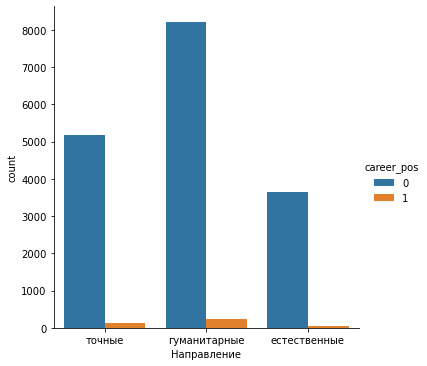

In [48]:

sns.catplot(x='Направление',data=cdf,hue='career_pos',kind='count')

# Social

In [49]:
cdf['social'].value_counts()

"skype": "-"                                         32
"skype": "нету"                                       9
"skype": "..."                                        8
"skype": "нет"                                        7
"skype": "_"                                          4
                                                     ..
"instagram": "galiev._"                               1
"instagram": "tanushaborisova24"                      1
"twitter": "njr_style", "instagram": "pavelkovv_"     1
"instagram": "anastasiya_zerebcova"                   1
"instagram": "13.198.356"                             1
Name: social, Length: 4874, dtype: int64

In [50]:
for i in cdf['social'].unique():
    print(i)

nan
"skype": "porfirov23"
"instagram": "zeeeyyytunyan"
"instagram": "nessy_bell"
"skype": "myachina2001550", "instagram": "mch.yulya01"
"instagram": "tolbina_kristina"
"instagram": "first.demon"
"instagram": "a.cheltuev"
"instagram": "mirophin"
"instagram": "anastacia69_"
"skype": "darya.apasova1"
"skype": "saniaz17l28"
"instagram": "dcjongg"
"skype": "kristina_kristi_cat"
"skype": "Chaitan22rus", "instagram": "nechaev_447"
"instagram": "alndn1"
"instagram": "kondemon"
"instagram": "maksim_ruppel"
"instagram": "nekit.alcapone"
"instagram": "knopkamed"
"instagram": "dashaamaslennikova"
"instagram": "polly_yapra"
"instagram": "lulliamy"
"instagram": "begliy348"
"instagram": "abrashina_07"
"skype": "polina067438"
"instagram": "aksssssssssssss1"
"instagram": "evinish_"
"instagram": "frankyfreakyfolk"
"skype": "alexei...."
"instagram": "selishcheva01"
"instagram": "sonya_tatarintseva_"
"instagram": "mariakholodkova"
"instagram": "aisatsana_12"
"instagram": "s_anastasia_v_"
"skype": "Carefre

"instagram": "dashakanzer"
"instagram": "xen.radz"
"instagram": "vanyamilicin"
"skype": "weila00", "instagram": "dalcomhanbinmal"
"twitter": "velmaikina", "instagram": "velmaikina"
"instagram": "excalibro_"
"instagram": "olya_1018"
"instagram": "podshivalov.nik"
"skype": "itcho93"
"twitter": "Korkin_Simon", "instagram": "_denis_simon_"
"instagram": "erswt"
"skype": "shina969"
"instagram": "snyaden"
"instagram": "lizakichaeva"
"instagram": "peredozzz_d"
"instagram": "_.sheff_"
"instagram": "t.a_nik"
"instagram": "mikhay_n"
"instagram": "crispkis"
"instagram": "okremerr"
"skype": "alekseichuk48"
"instagram": "igg_polina"
"instagram": "nastyasialuck"
"instagram": "__infinity__14"
"instagram": "davidsharganov"
"instagram": "only_forever8"
"instagram": "d_tamara_"
"instagram": "sasha_gr1shin"
"instagram": "never_trip_again"
"instagram": "_cherry72_"
"instagram": "_.god_given._"
"instagram": "atayants88"
"instagram": "savitar.official"
"instagram": "emi_jelly"
"instagram": "___mavika___"
"in

"instagram": "elijaqq"
"instagram": "ulyanchik._"
"instagram": "fokenup"
"instagram": "nasta_tyryshkina"
"instagram": "alina_vankova_"
"instagram": "postqum"
"instagram": "jleraa2.0"
"instagram": "olechka__18_"
"skype": "Kotenok_145_"
"instagram": "sklizovva"
"instagram": "chuplygina.u"
"instagram": "nastiya_16"
"instagram": "egorgoga_"
"instagram": "petrosyankarma"
"instagram": "sashasmr1"
"instagram": "e_hudashova"
"skype": "i11223344556677889900"
"instagram": "true_kamenev13"
"instagram": "samieva_evgenia"
"instagram": "obsessionn__"
"skype": "NO"
"skype": "zmee_lov21"
"skype": "Ilyaurt", "instagram": "ilusha_urt"
"instagram": "julia_karabasova"
"instagram": "_holydoe"
"instagram": "il.golubev"
"instagram": "reeeebka"
"instagram": "katoalexandra_"
"instagram": "_piterparker__"
"skype": "dima.ashmarin", "instagram": "ashmarindmitrii"
"instagram": "marina__sviridonova"
"skype": "klukva442"
"instagram": "egorturgenev"
"instagram": "daria_konopleva_"
"instagram": "dim5343"
"instagram": 

"instagram": "your_leila"
"instagram": "feirnvxy"
"instagram": "juliabachmanova"
"skype": "sheshunova_", "instagram": "lera_sheshunova"
"skype": "varyanalivalkina", "twitter": "vnlvlk", "instagram": "varyanalivalkina"
"instagram": "butselfishcute"
"instagram": "_en.av"
"skype": "pasha_00739", "instagram": "pertsev.pavel"
"instagram": "kseniya.shi"
"instagram": "bulavinaangelina"
"skype": "livedudorow.nik", "twitter": "ndudorow", "instagram": "nikita_dudorow"
"instagram": "str.ler"
"skype": "...", "instagram": "posstnikovaaa"
"skype": "yulagoo_1"
"skype": "ilyanikulin151"
"instagram": "lerfilatova"
"instagram": "layrs_dc"
"instagram": "anastasianaumkina7"
"instagram": "elzebetth"
"skype": "kashirin.leonid"
"instagram": "kolia_ska"
"instagram": "danya_fox5"
"skype": "spider66617"
"skype": "chetin.tony", "facebook": "241145483081447", "instagram": "__chetin__anton__"
"twitter": "__stasik___", "instagram": "___stasik__"
"instagram": "arisha__mi"
"twitter": "the_kalimulfor", "instagram": "k

"instagram": "waalleyy"
"instagram": "_ruslan_2023"
"instagram": "diana_maksimiva"
"instagram": "kar__gasparyan"
"instagram": "smutkaa"
"instagram": "vikusik_73"
"instagram": "ychhr"
"instagram": "_regishkkkkkkkkka_"
"instagram": "danekk7"
"twitter": "ZaripovaDinara", "instagram": "dinarkaz_11"
"instagram": "unvie"
"instagram": "black.check"
"instagram": "immortality__mind_"
"instagram": "iorken_few"
"instagram": "lifenjooy"
"instagram": "ju1_ya"
"instagram": "_futbolist_73_"
"twitter": "EnSilvJester", "facebook": "+1487147701600840", "instagram": "ensilvjester"
"instagram": "v__sklv"
"instagram": "gracheva_ang"
"instagram": "lolyapolyaa"
"instagram": "anastyash"
"instagram": "_.s.h.a.n.u.l.y._"
"instagram": "avgasia"
"instagram": "amovi_swan"
"skype": "daniil5594"
"instagram": "gramzorq"
"twitter": "_klementeva_", "instagram": "_klementeva"
"instagram": "nastya_galnykina"
"instagram": "en.leel"
"skype": "Mr.Stilder"
"instagram": "ttnsmnv"
"instagram": "axaxaxaxaaaxa"
"instagram": "kir

In [51]:
def addsocial(row):
    if type(row['social']) == str and row['social'].find('skype') > 0 :
        return 'skype'
    elif type(row['social']) == str and row['social'].find('instagram') > 0 :
        return 'instagram'
    elif type(row['social']) == str and row['social'].find('twitter') > 0 :
        return 'twitter'
    
    else:
        return np.NaN

        
cdf['social_si'] = cdf.apply(lambda row: addsocial(row), axis = 1) 

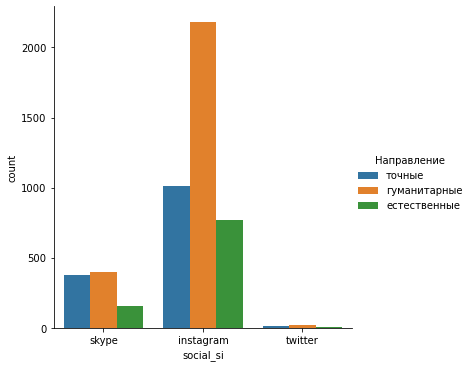

In [52]:
sns.catplot(x='social_si',data=cdf,hue='Направление',kind='count')

# HasPhoto

In [53]:
cdf['has_photo'].value_counts()

1.0    16885
0.0      586
Name: has_photo, dtype: int64

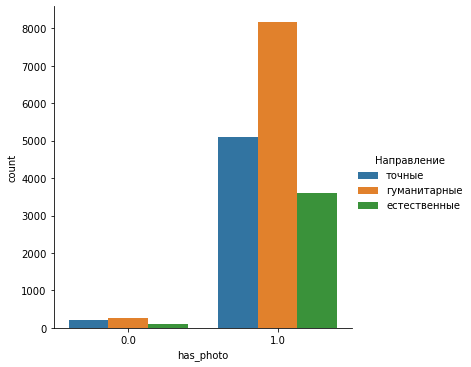

In [54]:
sns.catplot(x='has_photo',data=cdf,hue='Направление',kind='count')

# Phone

In [55]:
for i in cdf['phone'].unique():
    print(i)

nan
{"mobile_phone": "89282911772"}
{"home_phone": "???", "mobile_phone": "???"}
{"mobile_phone": "8***********"}
{"mobile_phone": "89969622885"}
{"mobile_phone": "89631980632"}
{"mobile_phone": "89969624693"}
{"mobile_phone": "891369833**"}
{"mobile_phone": "8913235120*"}
{"mobile_phone": "89635215636"}
{"home_phone": "Кружка"}
{"mobile_phone": "89833501101"}
{"home_phone": "******", "mobile_phone": "89*********"}
{"mobile_phone": "+7-923-000-78-93"}
{"mobile_phone": "89831086972"}
{"mobile_phone": "+7923..."}
{"mobile_phone": "+79635790636"}
{"mobile_phone": "89609552975"}
{"mobile_phone": "+79635762929"}
{"mobile_phone": "89130912500"}
{"mobile_phone": "89831853850"}
{"mobile_phone": "8923728****"}
{"mobile_phone": "89130933166"}
{"mobile_phone": "8913083474*"}
{"mobile_phone": "кефир"}
{"mobile_phone": "89833943651"}
{"mobile_phone": "89831095248"}
{"mobile_phone": "89831058941"}
{"mobile_phone": "+79969519874"}
{"mobile_phone": "89627961618"}
{"mobile_phone": "890592594**"}
{"mobi

{"mobile_phone": "89********3"}
{"mobile_phone": "8929707****"}
{"mobile_phone": "89093703580"}
{"mobile_phone": "898793042**"}
{"mobile_phone": "89093713064"}
{"home_phone": "...", "mobile_phone": "..."}
{"mobile_phone": "89277213758"}
{"home_phone": "+79179768307"}
{"mobile_phone": "89024282194"}
{"mobile_phone": "898795**041"}
{"mobile_phone": "+79171425360"}
{"mobile_phone": "8 927 219"}
{"mobile_phone": "досв"}
{"home_phone": "????&#", "mobile_phone": "????&#"}
{"mobile_phone": "89379826386"}
{"mobile_phone": "89649948956"}
{"home_phone": "89626229229"}
{"home_phone": "-", "mobile_phone": "87777777777"}
{"home_phone": "77*65*", "mobile_phone": "8908*5968**"}
{"mobile_phone": "89271207157"}
{"mobile_phone": "89372453**6"}
{"mobile_phone": "+77774248197"}
{"mobile_phone": "Xiaomi"}
{"mobile_phone": "89030232837"}
{"mobile_phone": "89271012017"}
{"mobile_phone": "8 987 804 77 79"}
{"mobile_phone": "89626280361"}
{"mobile_phone": "89063101399"}
{"mobile_phone": "Сашко"}
{"mobile_phone

In [56]:
def addphone(row):
    if type(row['phone']) == str and row['phone'].find('home_phone') > 0  and row['phone'].find('mobile_phone') > 0:
        return 'h and m'
    elif type(row['phone']) == str and row['phone'].find('home_phone') > 0 :
        return 'home_phone'
    elif type(row['phone']) == str and row['phone'].find('mobile_phone') > 0 :
        return 'mobile_phone'
    else:
        return np.NaN

        
cdf['phone_si'] = cdf.apply(lambda row: addphone(row), axis = 1) 

In [57]:
cdf['phone_si'].value_counts()

mobile_phone    1473
h and m          538
home_phone       175
Name: phone_si, dtype: int64

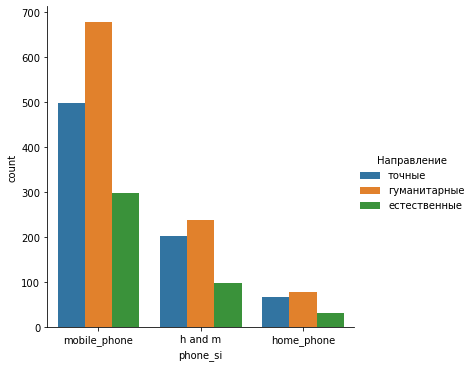

In [58]:
sns.catplot(x='phone_si',data=cdf,hue='Направление',kind='count')

# Site

In [59]:
cdf['site'].value_counts()

-                                                                      33
нет                                                                    32
                                                                       28
нету                                                                   18
...                                                                     9
                                                                       ..
                                                                        1
https://instagram.com/marshmallow______________?igshid=xnaqfldspcf2     1
Ты уже здесь                                                            1
http://sprashivai.ru/_Milana___Milana_                                  1
Inst: _malyshka__li                                                     1
Name: site, Length: 2169, dtype: int64

# Status

In [60]:
cdf['status'].value_counts()

??                                                       615
????                                                     159
?                                                        118
??????                                                    97
???                                                       58
                                                        ... 
Ненависть поглощает всю истинную сущность человека...      1
inst: @marina_bord ????                                    1
жить - это больше, чем чудесно?                            1
It's mine                                                  1
inst: _.kotechka._                                         1
Name: status, Length: 7950, dtype: int64

In [61]:
def addstatus(row):
    if type(row['status']) == str and row['status'].find('?') > 0 :
        return 1
    else:
        return 0

        
cdf['status_q'] = cdf.apply(lambda row: addstatus(row), axis = 1) 

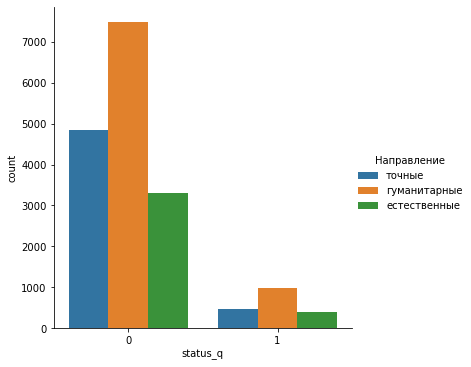

In [62]:
sns.catplot(x='status_q',data=cdf,hue='Направление',kind='count')

<AxesSubplot:>

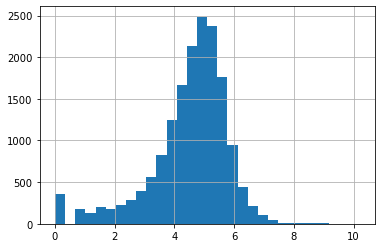

In [63]:
np.log(cdf['followers_count']+1).hist(bins = 30)

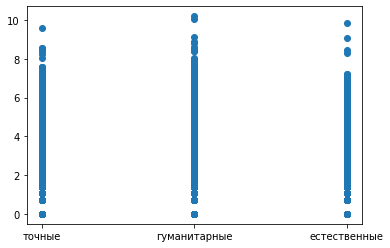

In [64]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(cdf['Направление'],np.log(cdf['followers_count']+1))

In [65]:
newdf = cdf[cdf['followers_count'] == 0]
newdf['Направление'].value_counts()

гуманитарные    186
точные          100
естественные     68
Name: Направление, dtype: int64

In [66]:
cdf['followers_count'].describe()

count    16792.000000
mean       171.008516
std        416.641630
min          0.000000
25%         53.000000
50%        116.000000
75%        208.000000
max      26619.000000
Name: followers_count, dtype: float64

In [67]:
print(cdf[cdf['Направление']== 'точные']['followers_count'].mean())
print(cdf[cdf['Направление']== 'гуманитарные']['followers_count'].mean())
print(cdf[cdf['Направление']== 'естественные']['followers_count'].mean())

146.79139784946236
190.8715324867464
160.56590016825575


In [68]:
t = cdf[cdf['Направление']== 'точные']['followers_count']
g = cdf[cdf['Направление']== 'гуманитарные']['followers_count']
e = cdf[cdf['Направление']== 'естественные']['followers_count']

In [69]:
t.fillna(t.median(),inplace=True)
g.fillna(g.median(),inplace=True)
e.fillna(e.median(),inplace=True)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [70]:
from scipy import stats

stats.kruskal(t,g,e)

KruskalResult(statistic=260.75258973022227, pvalue=2.389431414003083e-57)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

Text(0, 0.5, 'Density')

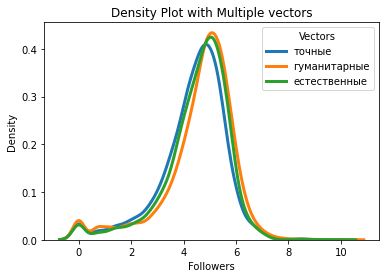

In [71]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

for n in cdf['Направление'].unique():
    # Subset to the airline
    subset = cdf[cdf['Направление'] == n]
    
    # Draw the density plot
    sns.distplot(np.log(subset['followers_count'] + 1), hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = n)
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Vectors')
plt.title('Density Plot with Multiple vectors')
plt.xlabel('Followers')
plt.ylabel('Density')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

Text(0, 0.5, 'Density')

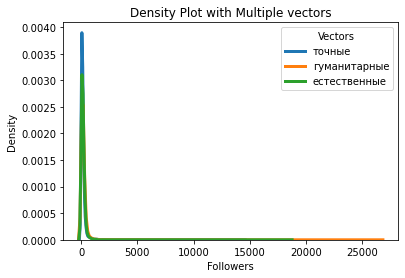

In [72]:


for n in cdf['Направление'].unique():
    # Subset to the airline
    subset = cdf[cdf['Направление'] == n]
    
    # Draw the density plot
    sns.distplot(subset['followers_count'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = n)
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Vectors')
plt.title('Density Plot with Multiple vectors')
plt.xlabel('Followers')
plt.ylabel('Density')

In [73]:
cdf.columns

Index(['bdate', 'last_seen', 'maiden_name', 'city_id', 'city_title',
       'country_id', 'home_town', 'education', 'occupation', 'universities',
       'schools', 'career', 'social', 'has_photo', 'phone', 'site', 'status',
       'followers_count', 'relatives', 'relation', 'personal', 'about',
       'universities_faculty_name', 'ПредмОбл Итог', 'Направление',
       'user_items', 'publics', 'groups', 'day', 'month', 'm_name',
       'changecity', 'career_pos', 'social_si', 'phone_si', 'status_q'],
      dtype='object')

# Relatives

In [74]:
cdf['relatives'].value_counts()

[{"id": 173498194, "type": "sibling"}]                                                                                                                                                                                                                                                                                                2
[{"id": 152770447, "type": "parent"}]                                                                                                                                                                                                                                                                                                 2
[{"id": 169568576, "type": "sibling"}, {"id": 138979022, "type": "sibling"}, {"id": 145411708, "type": "sibling"}, {"id": 135529443, "type": "sibling"}, {"id": 52572747, "type": "sibling"}]                                                                                                                                         2
[{"id": 18607843

In [75]:
def addsib(row):
    if type(row['relatives']) == str and row['relatives'].find('sibling') > 0 :
        return row['relatives'].count('sibling')
    else:
        return 0

        
cdf['siblings'] = cdf.apply(lambda row: addsib(row), axis = 1) 

In [76]:
def addpar(row):
    if type(row['relatives']) == str and row['relatives'].find('parent') > 0 :
        return row['relatives'].count('parent')
    else:
        return 0

        
cdf['parents'] = cdf.apply(lambda row: addpar(row), axis = 1) 

In [77]:
def addgpar(row):
    if type(row['relatives']) == str and row['relatives'].find('grandparent') > 0 :
        return row['relatives'].count('grandparent')
    else:
        return 0

        
cdf['gparents'] = cdf.apply(lambda row: addgpar(row), axis = 1) 

In [78]:
for i in cdf['relatives'].unique():
    print(i)

nan
[{"id": 406088336, "type": "sibling"}, {"id": 552760450, "type": "sibling"}]
[{"id": 297907823, "type": "sibling"}]
[{"id": 376407029, "type": "sibling"}]
[{"id": 209922011, "type": "sibling"}, {"id": 561084587, "type": "sibling"}]
[{"id": 16222987, "type": "sibling"}, {"id": 186520580, "type": "sibling"}, {"id": 253529052, "type": "sibling"}, {"id": 282318171, "type": "sibling"}, {"id": 271044307, "type": "sibling"}]
[{"id": 377987345, "type": "grandparent"}, {"id": 239729762, "type": "sibling"}, {"id": 274192112, "type": "sibling"}, {"id": 369968946, "type": "sibling"}]
[{"id": 319265580, "type": "sibling"}, {"id": 48212627, "type": "sibling"}]
[{"id": 340709564, "type": "sibling"}, {"id": 111410257, "type": "sibling"}, {"id": 311100763, "type": "sibling"}]
[{"id": 186690374, "type": "sibling"}, {"id": 473709108, "type": "sibling"}]
[{"id": 321617465, "type": "sibling"}]
[{"id": 356325969, "type": "sibling"}]
[{"id": 324355044, "type": "sibling"}, {"id": 261092743, "type": "sibli

[{"id": 168517730, "type": "parent"}, {"id": 57568243, "type": "sibling"}, {"id": 139013478, "type": "sibling"}, {"id": 220816569, "type": "sibling"}, {"id": -405487790, "name": "Хомякова Татьяна", "type": "parent"}]
[{"id": 413025240, "type": "grandparent"}]
[{"id": 225438641, "type": "sibling"}, {"id": 263662248, "type": "sibling"}]
[{"id": 166497238, "type": "parent"}, {"id": -856941553, "name": "Куликов Александр", "type": "parent"}, {"id": -574648743, "name": "Куликова Галина", "type": "grandparent"}, {"id": -422192139, "name": "Куликов Сергей", "type": "grandparent"}, {"id": 192709334, "type": "sibling"}, {"id": 292069928, "type": "sibling"}, {"id": 120679439, "type": "sibling"}, {"id": 577882338, "type": "sibling"}]
[{"id": 105799925, "type": "sibling"}, {"id": 107004410, "type": "sibling"}]
[{"id": 245663075, "type": "parent"}, {"id": 502189129, "type": "parent"}]
[{"id": 151037457, "type": "sibling"}]
[{"id": -296953478, "name": "Эссаулов Савелий", "type": "sibling"}, {"id": 1

[{"id": 217133715, "type": "sibling"}]
[{"id": -874875574, "name": "Нет", "type": "child"}, {"id": -358547849, "name": "Нет", "type": "grandchild"}]
[{"id": 19755063, "type": "sibling"}]
[{"id": 352692382, "type": "sibling"}]
[{"id": 9598361, "type": "sibling"}, {"id": 166263635, "type": "parent"}, {"id": 187097405, "type": "sibling"}]
[{"id": 19094107, "type": "sibling"}]
[{"id": 259046559, "type": "sibling"}, {"id": 2526803, "type": "sibling"}, {"id": 22707102, "type": "sibling"}]
[{"id": 30439805, "type": "sibling"}, {"id": 244252457, "type": "parent"}, {"id": -469326430, "name": "Дмитрий Глухов", "type": "parent"}]
[{"id": 55048803, "type": "sibling"}, {"id": 223087579, "type": "parent"}, {"id": 204105500, "type": "parent"}]
[{"id": -889706035, "name": "Елена Имран", "type": "parent"}, {"id": -951991647, "name": "Тимур Назаров", "type": "sibling"}, {"id": -509351129, "name": "Наталья Михаил", "type": "grandparent"}]
[{"id": 117253487, "type": "parent"}, {"id": 195684407, "type": "g

[{"id": 133737978, "type": "sibling"}]
[{"id": 244649690, "type": "child"}]
[{"id": 53928904, "type": "parent"}, {"id": 167849229, "type": "grandparent"}]
[{"id": 139032497, "type": "sibling"}, {"id": 308572643, "type": "parent"}, {"id": 525588370, "type": "parent"}]
[{"id": 20931979, "type": "parent"}, {"id": 156960434, "type": "sibling"}, {"id": 26464555, "type": "sibling"}]
[{"id": 210214290, "type": "parent"}]
[{"id": 320723299, "type": "parent"}]
[{"id": -669460267, "name": "Стёпа Даутов", "type": "sibling"}]
[{"id": -652722779, "name": "Сергей Петрович", "type": "parent"}, {"id": 231914407, "type": "parent"}, {"id": 30662926, "type": "sibling"}, {"id": 441819509, "type": "grandparent"}, {"id": -975670050, "name": "Юрий Геннадьевич", "type": "grandparent"}]
[{"id": 10294476, "type": "parent"}]
[{"id": 236283786, "type": "sibling"}, {"id": 181298360, "type": "parent"}, {"id": -662388253, "name": "Тамара Захарова", "type": "grandparent"}, {"id": -734985802, "name": "Иван Захаров", "

[{"id": 435533268, "type": "sibling"}, {"id": 433101073, "type": "sibling"}, {"id": 232571704, "type": "sibling"}, {"id": 219572335, "type": "sibling"}, {"id": 208645861, "type": "sibling"}, {"id": 309121690, "type": "sibling"}, {"id": 139436464, "type": "child"}, {"id": 90589475, "type": "sibling"}, {"id": 366426890, "type": "sibling"}, {"id": 219341498, "type": "grandparent"}, {"id": 223322778, "type": "grandparent"}]
[{"id": 229680339, "type": "sibling"}]
[{"id": -138417511, "name": "Ирина Викторовна", "type": "parent"}]
[{"id": 81561401, "type": "sibling"}]
[{"id": 392559382, "type": "sibling"}]
[{"id": 36875801, "type": "sibling"}]
[{"id": 104724895, "type": "sibling"}, {"id": 6467548, "type": "sibling"}, {"id": 43193868, "type": "sibling"}, {"id": 219271130, "type": "sibling"}]
[{"id": 183529328, "type": "parent"}]
[{"id": 258389433, "type": "sibling"}]
[{"id": 9152755, "type": "sibling"}, {"id": 18577859, "type": "sibling"}]
[{"id": 80393299, "type": "sibling"}, {"id": 156963342

[{"id": 44807611, "type": "sibling"}]
[{"id": 121353017, "type": "parent"}]
[{"id": 139265551, "type": "sibling"}, {"id": 185332827, "type": "parent"}, {"id": 8518464, "type": "parent"}, {"id": 188072827, "type": "grandparent"}]
[{"id": 9168735, "type": "sibling"}]
[{"id": -942839664, "name": "Будут", "type": "child"}, {"id": 194904835, "type": "parent"}, {"id": 350075492, "type": "sibling"}, {"id": 153493076, "type": "sibling"}, {"id": 351711531, "type": "sibling"}, {"id": 369821666, "type": "grandparent"}, {"id": 511028421, "type": "parent"}]
[{"id": 205700369, "type": "sibling"}]
[{"id": 287881092, "type": "sibling"}, {"id": 391013647, "type": "sibling"}, {"id": 531383129, "type": "sibling"}, {"id": 556820762, "type": "sibling"}]
[{"id": 35484834, "type": "sibling"}, {"id": 439226631, "type": "parent"}]
[{"id": 310591658, "type": "parent"}, {"id": -550677126, "name": "Сергей Тимаков", "type": "parent"}, {"id": 170507658, "type": "sibling"}]
[{"id": 426036436, "type": "sibling"}]
[{"

[{"id": 459631420, "type": "sibling"}, {"id": 295165753, "type": "sibling"}]
[{"id": 213290280, "type": "sibling"}, {"id": 400138428, "type": "parent"}]
[{"id": 327069170, "type": "sibling"}, {"id": 145741560, "type": "sibling"}]
[{"id": -764251988, "name": "Светлана Насирова", "type": "parent"}]
[{"id": 3952730, "type": "sibling"}, {"id": 237922917, "type": "sibling"}]
[{"id": -713099349, "name": "Немцев Сергей", "type": "parent"}, {"id": -253188534, "name": "Немцева Дарья", "type": "sibling"}, {"id": -450138265, "name": "Макова Валентина", "type": "grandparent"}]
[{"id": -688505376, "name": "Фридлевич Таисия", "type": "sibling"}]
[{"id": 3242236, "type": "parent"}]
[{"id": 261620570, "type": "sibling"}, {"id": 94425807, "type": "sibling"}, {"id": 65676561, "type": "sibling"}, {"id": 234686947, "type": "sibling"}, {"id": 388868806, "type": "sibling"}, {"id": 139404722, "type": "sibling"}, {"id": 275148612, "type": "sibling"}, {"id": 453589440, "type": "sibling"}, {"id": 348023337, "ty

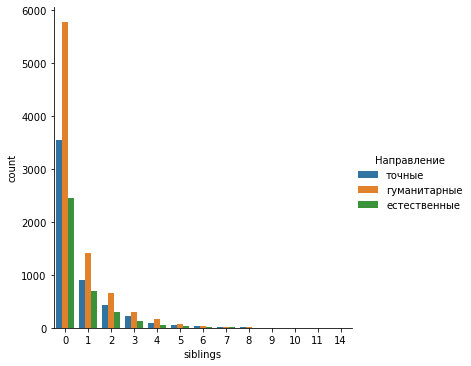

In [79]:
sns.catplot(x='siblings',data=cdf,hue='Направление',kind='count')

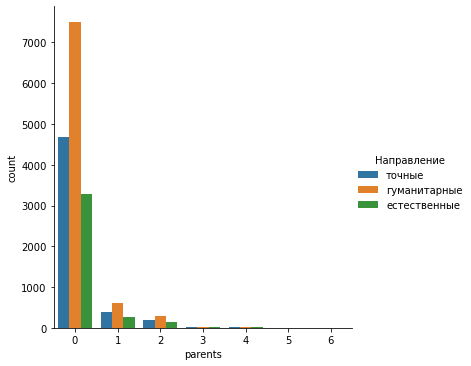

In [80]:
sns.catplot(x='parents',data=cdf,hue='Направление',kind='count')

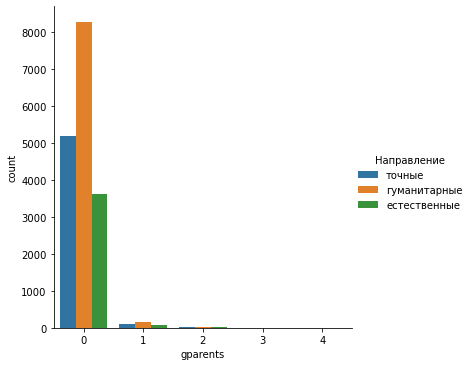

In [81]:
sns.catplot(x='gparents',data=cdf,hue='Направление',kind='count')

# Relation

In [82]:
cdf['relation'].value_counts()

{"relation": "1"}                                     847
{"relation": "6"}                                     682
{"relation": "7"}                                     521
{"relation": "2"}                                     359
{"relation": "4"}                                     204
                                                     ... 
{"relation": "7", "relation_partner": "86666612"}       1
{"relation": "3", "relation_partner": "227259320"}      1
{"relation": "7", "relation_partner": "264697665"}      1
{"relation": "2", "relation_partner": "68567032"}       1
{"relation": "2", "relation_partner": "137149383"}      1
Name: relation, Length: 1530, dtype: int64

In [83]:
for i in cdf['relation']:
    if type(i) == str:
        print(i.split(':')[1][2])

4
7
1
2
7
1
3
1
1
2
2
6
2
7
2
7
7
1
8
3
7
7
1
6
2
7
7
2
2
2
7
4
6
1
6
4
6
1
4
7
6
4
2
7
2
1
7
4
2
3
6
2
4
4
7
4
7
2
7
4
7
1
4
1
3
1
2
6
7
1
1
7
4
7
7
6
6
7
2
4
7
6
3
7
3
7
3
7
2
4
4
2
4
1
3
1
1
7
7
1
2
7
6
7
6
3
3
7
4
6
4
7
4
7
4
2
4
2
6
7
7
4
6
7
7
7
2
2
2
7
7
4
7
1
1
6
2
2
3
2
8
4
2
7
2
6
1
2
1
4
6
2
7
1
4
7
7
7
7
2
1
6
7
6
2
8
2
2
7
4
6
2
6
5
7
4
6
3
1
7
2
1
6
6
4
4
7
2
6
7
6
4
4
1
6
6
7
8
7
2
1
6
3
1
7
7
7
1
7
6
8
7
7
2
2
6
2
4
1
1
2
6
1
7
1
1
1
3
1
1
2
3
5
3
7
6
1
2
1
6
5
1
3
1
6
2
7
2
2
8
4
6
2
7
6
4
2
7
2
8
7
7
7
7
7
2
6
7
7
7
7
2
1
4
1
2
7
2
6
6
7
2
4
5
7
7
4
4
7
2
4
1
1
6
5
6
5
6
4
2
6
7
4
2
2
5
6
2
1
7
2
8
1
4
6
7
2
2
4
2
4
7
1
4
2
2
7
2
5
4
2
7
7
6
1
7
2
2
7
6
4
7
6
1
7
3
1
4
3
7
3
7
7
6
7
4
2
1
1
1
1
6
4
2
5
7
7
1
6
4
2
7
8
7
6
2
4
4
2
7
4
2
2
2
2
1
2
4
4
7
1
2
4
7
2
4
1
5
7
7
7
6
1
1
4
1
1
4
1
6
1
1
7
7
6
1
7
2
1
6
4
1
6
6
5
4
1
6
7
7
7
7
6
7
7
4
2
2
6
1
2
7
7
6
7
5
1
1
4
2
7
2
1
7
4
4
2
2
2
7
2
2
1
2
1
2
2
2
2
2
4
6
1
7
4
1
4
2
6
3
2
6
6
7
7
7
7
1
6
1
1
4
6
7
1
7
1
1
2
7


In [84]:
for i in cdf['relation']:
    print(i)

nan
{"relation": "4", "relation_partner": "203744957"}
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
{"relation": "7", "relation_partner": "441109515"}
{"relation": "1"}
{"relation": "2", "relation_partner": "559088424"}
{"relation": "7", "relation_partner": "161440681"}
nan
{"relation": "1"}
nan
nan
nan
{"relation": "3", "relation_partner": "315948790"}
nan
nan
{"relation": "1"}
nan
nan
nan
{"relation": "1"}
{"relation": "2"}
nan
nan
{"relation": "2", "relation_partner": "152271800"}
{"relation": "6"}
nan
nan
{"relation": "2", "relation_partner": "125551575"}
nan
nan
nan
{"relation": "7"}
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
{"relation": "2", "relation_partner": "176909315"}
nan
nan
nan
nan
nan
nan
nan
nan
{"relation": "7", "relation_partner": "144439251"}
nan
nan
{"relation": "7", "relation_partner": "302654347"}
{"relation": "1"}
nan
{"relation": "8", "relation_partner": "211293761"}
nan
nan
{"relation": "3", "relation_partner": "104442571"}
nan
nan
nan
nan
nan
{"relati

{"relation": "8"}
{"relation": "7"}
nan
{"relation": "7"}
nan
{"relation": "7", "relation_partner": "293099225"}
nan
nan
{"relation": "7", "relation_partner": "151221813"}
nan
{"relation": "7", "relation_partner": "141142088"}
nan
nan
{"relation": "2"}
nan
nan
nan
{"relation": "6"}
nan
nan
nan
nan
{"relation": "7", "relation_partner": "226968362"}
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
{"relation": "7", "relation_partner": "210851344"}
nan
nan
nan
{"relation": "7", "relation_partner": "327903465"}
nan
nan
{"relation": "7"}
nan
nan
nan
nan
nan
nan
nan
nan
nan
{"relation": "2", "relation_partner": "230741849"}
nan
nan
{"relation": "1"}
nan
nan
nan
nan
nan
nan
{"relation": "4", "relation_partner": "365153762"}
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
{"relation": "1"}
nan
nan
nan
nan
nan
nan
{"relation": "2"}
nan
{"relation": "7"}
nan
nan
nan
nan
nan
nan
nan
{"relation": "2"}
nan
nan
{"relation": "6"}
nan
nan
nan
nan
{"relation": "6"}
nan
{"relation": "7", "relation_partner": "2217412

nan
nan
nan
nan
{"relation": "6"}
nan
nan
nan
nan
nan
nan
{"relation": "1"}
nan
nan
{"relation": "6"}
nan
nan
nan
nan
nan
nan
{"relation": "7"}
{"relation": "1"}
{"relation": "4"}
nan
{"relation": "7", "relation_partner": "281998590"}
{"relation": "2", "relation_partner": "137485005"}
nan
nan
nan
{"relation": "2", "relation_partner": "150261254"}
nan
nan
nan
{"relation": "4"}
nan
nan
{"relation": "2", "relation_partner": "208364679"}
nan
nan
{"relation": "4"}
nan
nan
nan
nan
nan
{"relation": "4"}
{"relation": "2", "relation_partner": "184517656"}
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
{"relation": "4", "relation_partner": "437598689"}
nan
{"relation": "1"}
nan
nan
nan
nan
nan
nan
{"relation": "7"}
nan
{"relation": "1"}
nan
nan
nan
nan
nan
{"relation": "7"}
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
{"relation": "1"}
nan
nan
nan
{"relation": "4", "relation_partner": "99712422"}
nan
nan
nan
nan
{"relation": "1"}
nan
nan
nan
nan
{"relation": "6"}
nan
nan
nan
nan
nan
nan
nan
{"re

{"relation": "1"}
nan
nan
nan
nan
nan
nan
{"relation": "7", "relation_partner": "367370109"}
nan
nan
nan
{"relation": "1"}
nan
nan
nan
nan
{"relation": "1"}
nan
nan
nan
{"relation": "6"}
nan
{"relation": "7"}
{"relation": "7", "relation_partner": "214630932"}
{"relation": "1"}
{"relation": "1"}
{"relation": "7"}
{"relation": "7", "relation_partner": "396323543"}
nan
nan
nan
nan
{"relation": "7"}
nan
nan
{"relation": "6"}
nan
nan
{"relation": "4"}
nan
nan
{"relation": "6"}
nan
nan
{"relation": "1"}
nan
nan
{"relation": "7"}
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
{"relation": "2", "relation_partner": "301773310"}
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
{"relation": "2"}
nan
{"relation": "7", "relation_partner": "257408834"}
nan
nan
{"relation": "7", "relation_partner": "175147199"}
nan
{"relation": "5"}
nan
{"relation": "5"}
nan
nan
nan
nan
nan
nan
nan
nan
nan
{"relation": "1"}
{"relation": "6"}
{"relation": "1"}
nan
{"relation": "2", "rel

{"relation": "2", "relation_partner": "382510757"}
nan
nan
nan
nan
nan
nan
{"relation": "2", "relation_partner": "359292686"}
nan
{"relation": "7", "relation_partner": "227798061"}
nan
{"relation": "1"}
nan
nan
nan
nan
nan
nan
{"relation": "3"}
nan
nan
{"relation": "3"}
nan
nan
nan
nan
nan
nan
nan
{"relation": "1"}
nan
nan
nan
nan
nan
nan
nan
nan
{"relation": "3"}
nan
nan
nan
nan
nan
nan
nan
nan
nan
{"relation": "1"}
nan
nan
{"relation": "7"}
nan
nan
nan
{"relation": "7", "relation_partner": "335585582"}
nan
{"relation": "2"}
nan
nan
nan
{"relation": "7"}
nan
{"relation": "7"}
nan
nan
{"relation": "6"}
{"relation": "1"}
nan
nan
nan
{"relation": "1"}
{"relation": "6"}
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
{"relation": "6"}
nan
nan
nan
{"relation": "6"}
nan
nan
nan
nan
nan
{"relation": "4", "relation_partner": "168500849"}
nan
nan
nan
nan
{"relation": "4"}
nan
{"relation": "5"}
nan
nan
nan
{"relation": "6"}
nan
nan
{"relation": "6"}
{"relation": "6"}
nan

nan
{"relation": "2"}
{"relation": "6"}
nan
{"relation": "4", "relation_partner": "251240978"}
nan
nan
nan
{"relation": "4", "relation_partner": "144752262"}
{"relation": "6"}
nan
{"relation": "7", "relation_partner": "151635941"}
nan
{"relation": "4", "relation_partner": "87576029"}
{"relation": "7"}
nan
{"relation": "7"}
nan
nan
nan
{"relation": "2", "relation_partner": "247597142"}
nan
nan
nan
{"relation": "6"}
nan
nan
nan
{"relation": "5"}
{"relation": "2"}
nan
nan
{"relation": "2"}
nan
nan
{"relation": "1"}
{"relation": "6"}
nan
{"relation": "7"}
nan
{"relation": "7", "relation_partner": "497244195"}
nan
nan
nan
nan
nan
nan
nan
{"relation": "3", "relation_partner": "189709506"}
nan
nan
{"relation": "6"}
{"relation": "7", "relation_partner": "315802677"}
nan
{"relation": "7", "relation_partner": "259192933"}
nan
nan
nan
nan
nan
nan
nan
nan
{"relation": "7", "relation_partner": "505809942"}
nan
nan
nan
nan
nan
nan
nan
nan
{"relation": "6"}
nan
nan
nan
nan
{"relation": "2", "relation

nan
nan
nan
nan
nan
nan
nan
{"relation": "2", "relation_partner": "1871100"}
{"relation": "7", "relation_partner": "109340992"}
nan
nan
nan
{"relation": "1"}
nan
{"relation": "6"}
nan
{"relation": "6"}
nan
nan
{"relation": "7"}
nan
nan
nan
{"relation": "6"}
nan
nan
nan
nan
nan
nan
nan
nan
{"relation": "1"}
nan
nan
nan
nan
nan
nan
nan
nan
nan
{"relation": "4", "relation_partner": "198762571"}
nan
nan
{"relation": "6"}
nan
nan
nan
nan
nan
nan
nan
nan
{"relation": "7", "relation_partner": "125204583"}
nan
nan
nan
nan
{"relation": "6"}
nan
{"relation": "4", "relation_partner": "278620167"}
nan
{"relation": "2", "relation_partner": "152947932"}
{"relation": "2", "relation_partner": "289992483"}
nan
nan
nan
nan
{"relation": "2", "relation_partner": "131313732"}
nan
{"relation": "2"}
nan
nan
{"relation": "1"}
{"relation": "6"}
nan
{"relation": "1"}
nan
nan
nan
nan
nan
nan
nan
nan
{"relation": "7", "relation_partner": "134576751"}
nan
nan
{"relation": "2"}
nan
nan
nan
nan
nan
nan
nan
nan
nan
n

{"relation": "2"}
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
{"relation": "8"}
nan
nan
nan
nan
{"relation": "6"}
nan
nan
nan
nan
nan
nan
nan
nan
nan
{"relation": "6"}
nan
nan
nan
nan
nan
{"relation": "1"}
nan
{"relation": "1"}
nan
nan
{"relation": "7", "relation_partner": "248052701"}
nan
nan
{"relation": "1"}
nan
{"relation": "7", "relation_partner": "116601807"}
nan
{"relation": "7"}
nan
nan
nan
nan
{"relation": "1"}
nan
{"relation": "6"}
nan
nan
nan
nan
nan
{"relation": "2", "relation_partner": "212679829"}
nan
{"relation": "2", "relation_partner": "152619648"}
nan
nan
nan
nan
nan
nan
nan
{"relation": "6"}
nan
nan
{"relation": "6"}
nan
nan
nan
{"relation": "7", "relation_partner": "159204696"}
{"relation": "7"}
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
{"relation": "1"}
{"relation": "6"}
{"relation": "4"}
{"relation": "1"}
{"relation": "2", "relation_partner": "294940138"}
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
{"relation": "1"}
nan
{"

nan
nan
nan
nan
nan
nan
{"relation": "2", "relation_partner": "450788568"}
nan
{"relation": "4", "relation_partner": "142320645"}
nan
nan
nan
nan
nan
nan
nan
{"relation": "2", "relation_partner": "285787479"}
nan
{"relation": "2", "relation_partner": "507430398"}
nan
{"relation": "7", "relation_partner": "256374248"}
nan
nan
nan
nan
nan
{"relation": "1"}
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
{"relation": "1"}
{"relation": "1"}
nan
nan
nan
{"relation": "7", "relation_partner": "140566513"}
nan
nan
{"relation": "7"}
nan
{"relation": "2", "relation_partner": "221636336"}
nan
nan
nan
nan
nan
{"relation": "3", "relation_partner": "133541360"}
nan
nan
{"relation": "5"}
nan
nan
nan
{"relation": "1"}
nan
nan
nan
{"relation": "2", "relation_partner": "330516994"}
nan
nan
nan
nan
nan
nan
{"relation": "4"}
nan
nan
nan
nan
nan
nan
nan
nan
{"relation": "2"}
{"relation": "6"}
nan
{"relation": "6"}
nan
nan
nan
{"relation": "4", "relation_partner": "328865029"

nan
nan
nan
nan
nan
nan
nan
{"relation": "1"}
nan
nan
{"relation": "2", "relation_partner": "351111119"}
nan
nan
{"relation": "6"}
nan
{"relation": "2"}
{"relation": "6"}
nan
{"relation": "6"}
nan
nan
{"relation": "1"}
nan
nan
{"relation": "1"}
{"relation": "4", "relation_partner": "210254659"}
nan
nan
nan
{"relation": "7", "relation_partner": "150991480"}
nan
{"relation": "7", "relation_partner": "297061028"}
nan
nan
nan
nan
nan
nan
nan
nan
nan
{"relation": "7"}
{"relation": "7"}
{"relation": "1"}
nan
nan
nan
nan
nan
nan
nan
{"relation": "4", "relation_partner": "168897178"}
{"relation": "6"}
nan
nan
nan
nan
{"relation": "4", "relation_partner": "273193552"}
{"relation": "7", "relation_partner": "185413419"}
nan
nan
nan
nan
nan
nan
nan
nan
nan
{"relation": "7", "relation_partner": "302573247"}
nan
nan
nan
{"relation": "6"}
nan
{"relation": "2", "relation_partner": "293580914"}
nan
nan
nan
nan
{"relation": "4"}
nan
{"relation": "2"}
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
{"relatio

nan
nan
nan
{"relation": "7", "relation_partner": "492620474"}
nan
nan
nan
nan
nan
nan
nan
nan
{"relation": "6"}
nan
nan
nan
nan
{"relation": "6"}
nan
{"relation": "6"}
nan
nan
nan
nan
nan
nan
nan
{"relation": "7", "relation_partner": "178266062"}
nan
nan
nan
nan
{"relation": "6"}
nan
{"relation": "7"}
nan
nan
nan
nan
nan
nan
nan
nan
{"relation": "2"}
nan
nan
nan
nan
{"relation": "4"}
nan
{"relation": "4", "relation_partner": "365533258"}
{"relation": "6"}
nan
nan
nan
nan
nan
nan
{"relation": "8"}
nan
nan
{"relation": "7", "relation_partner": "232948894"}
nan
nan
{"relation": "6"}
{"relation": "7", "relation_partner": "221284663"}
nan
nan
nan
{"relation": "7", "relation_partner": "371788785"}
{"relation": "7", "relation_partner": "214099591"}
nan
nan
{"relation": "2", "relation_partner": "136318381"}
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
{"relation": "2", "relation_partner": "293180211"}
nan
nan
{"relation": "1"}
nan
nan
nan
{"relation": "7"}
{"relation": "1"}
nan
nan
nan

nan
{"relation": "6"}
nan
{"relation": "4"}
{"relation": "6"}
nan
nan
nan
nan
{"relation": "7"}
nan
nan
nan
nan
nan
nan
nan
{"relation": "7"}
nan
nan
nan
{"relation": "1"}
{"relation": "7", "relation_partner": "361568374"}
nan
nan
{"relation": "7", "relation_partner": "277553376"}
{"relation": "2"}
nan
{"relation": "7", "relation_partner": "426346178"}
{"relation": "1"}
nan
nan
nan
nan
nan
nan
{"relation": "6"}
nan
nan
nan
nan
nan
{"relation": "6"}
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
{"relation": "4", "relation_partner": "168514067"}
{"relation": "7"}
nan
{"relation": "7", "relation_partner": "176551475"}
nan
nan
{"relation": "1"}
nan
{"relation": "7", "relation_partner": "224466817"}
nan
{"relation": "5"}
nan
nan
{"relation": "7"}
nan
nan
nan
{"relation": "7"}
nan
nan
nan
{"relation": "4"}
nan
nan
nan
nan
nan
nan
nan
{"relation": "4", "relation_partner": "563993742"}
nan
{"relation": "1"}
nan
{"relation": "6"}
nan
nan
nan
nan
nan
nan
{"relation": "6"}
nan
nan
nan
nan
{"relation": 

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
{"relation": "6"}
nan
nan
nan
nan
nan
nan
nan
{"relation": "2"}
nan
{"relation": "7", "relation_partner": "118417517"}
nan
nan
nan
{"relation": "7", "relation_partner": "323834174"}
nan
nan
nan
{"relation": "7", "relation_partner": "546657612"}
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
{"relation": "7", "relation_partner": "250594665"}
{"relation": "7"}
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
{"relation": "1"}
nan
{"relation": "2", "relation_partner": "218552451"}
{"relation": "7"}
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
{"relation": "6"}
{"relation": "1"}
{"relation": "3"}
nan
nan
nan
{"relation": "3", "relation_partner": "522074113"}
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
{"relation": "7", "relation_partner": "228342568"}
{"relation": "1"}
nan
nan
nan
nan
{"relation": "7"}
nan
nan
{"relation": "3"}
{"relation": "6"}
nan
nan
nan
nan
nan
nan
nan
{"relation": "6"}
nan
nan
nan
nan
nan
nan
{"relation": "7",

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
{"relation": "7", "relation_partner": "353549851"}
nan
{"relation": "7"}
nan
nan
nan
nan
nan
nan
{"relation": "1"}
nan
{"relation": "1"}
nan
{"relation": "4"}
{"relation": "1"}
nan
{"relation": "1"}
nan
{"relation": "2", "relation_partner": "137660050"}
{"relation": "6"}
{"relation": "1"}
{"relation": "2"}
nan
nan
{"relation": "7", "relation_partner": "135594995"}
{"relation": "2"}
nan
nan
nan
{"relation": "1"}
{"relation": "3", "relation_partner": "150911311"}
{"relation": "6"}
nan
{"relation": "7", "relation_partner": "266710271"}
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
{"relation": "7", "relation_partner": "66674817"}
{"relation": "3", "relation_partner": "484668886"}
{"relation": "2", "relation_partner": "405771467"}
nan
nan
nan
nan
{"relation": "2"}
nan
{"relation": "4", "relation_partner": "340337900"}
{"relation": "6"}
nan
{"relation": "3"}
nan
nan
nan
nan
{"relation": "4", "relation_partner": "553125376"}
nan
nan
nan
{

{"relation": "6"}
nan
nan
nan
nan
{"relation": "7"}
{"relation": "6"}
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
{"relation": "6"}
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
{"relation": "2"}
nan
nan
{"relation": "6"}
nan
{"relation": "1"}
{"relation": "7"}
{"relation": "1"}
nan
nan
{"relation": "4"}
nan
nan
nan
{"relation": "7", "relation_partner": "454520067"}
nan
nan
{"relation": "7"}
{"relation": "7", "relation_partner": "345121749"}
{"relation": "7"}
nan
nan
{"relation": "6"}
{"relation": "7"}
nan
nan
nan
{"relation": "6"}
nan
{"relation": "7", "relation_partner": "541805506"}
nan
nan
{"relation": "7"}
nan
nan
nan
nan
nan
{"relation": "6"}
{"relation": "2"}
{"relation": "2"}
nan
nan
nan
{"relation": "2", "relation_partner": "560301910"}
nan
nan
nan
nan
nan
{"relation": "2", "relation_partner": "163750054"}
{"relation": "7", "relation_partner": "308959882"}
nan
nan
nan
nan
{"relation": "4", "relation_partner": "369816787"}
{"relation": "6"}
{"relat

nan
nan
nan
nan
nan
{"relation": "1"}
nan
nan
nan
nan
{"relation": "6"}
nan
{"relation": "6"}
nan
nan
nan
nan
{"relation": "7"}
nan
{"relation": "6"}
{"relation": "4"}
{"relation": "7", "relation_partner": "209446307"}
nan
{"relation": "2", "relation_partner": "467844514"}
nan
{"relation": "6"}
nan
{"relation": "1"}
{"relation": "4", "relation_partner": "166616069"}
nan
nan
{"relation": "2", "relation_partner": "143078313"}
{"relation": "1"}
{"relation": "2", "relation_partner": "368600182"}
{"relation": "1"}
nan
nan
nan
nan
nan
{"relation": "4"}
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
{"relation": "4", "relation_partner": "497236383"}
{"relation": "7", "relation_partner": "209897064"}
nan
nan
nan
nan
nan
{"relation": "2"}
nan
{"relation": "7"}
{"relation": "7"}
nan
nan
nan
{"relation": "7", "relation_partner": "523288688"}
nan
{"relation": "1"}
{"relation": "5"}
{"relation": "7"}
{"relation": "6"}
nan
{"relation": "2"}
nan
nan
nan
nan
{"relation": "7"}
nan
{"relation": "1"}
{"relation

In [85]:
def addrel(row):
    if type(row['relation']) == str:
        return row['relation'].split(':')[1][2]
    else:
        return 0

        
cdf['typerel'] = cdf.apply(lambda row: addrel(row), axis = 1) 

In [86]:
def addpar(row):
    if type(row['relation']) == str and row['relation'].find('relation_partner') > 0:
        return 1
    else:
        return 0

        
cdf['partner'] = cdf.apply(lambda row: addpar(row), axis = 1) 

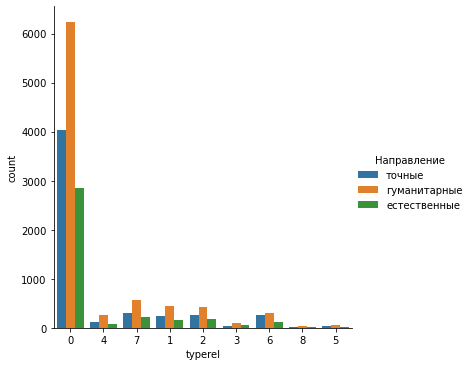

In [87]:
sns.catplot(x='typerel',data=cdf,hue='Направление',kind='count')

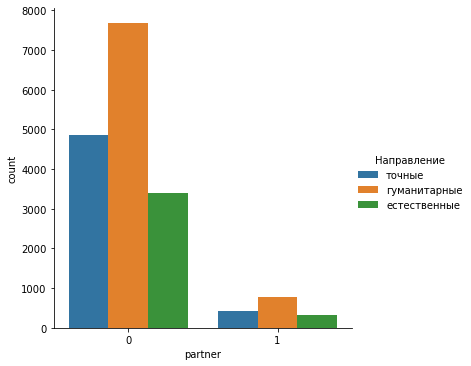

In [88]:
sns.catplot(x='partner',data=cdf,hue='Направление',kind='count')

# Personal

In [89]:
cdf['personal'].value_counts()

{"langs": "[\"Русский\"]"}                                                                                                  4290
{"langs": "[\"Русский\", \"English\"]"}                                                                                     1030
{"langs": "[\"Русский\", \"English\", \"Deutsch\"]"}                                                                          83
{"langs": "[\"Русский\"]", "smoking": "1"}                                                                                    81
{"langs": "[\"Русский\"]", "smoking": "1", "life_main": "1", "people_main": "2"}                                              75
                                                                                                                            ... 
{"langs": "[\"Русский\"]", "alcohol": "4", "smoking": "2", "life_main": "5", "people_main": "6"}                               1
{"langs": "[\"Русский\", \"Az?rbaycan dili\", \"????\"]", "life_main": "6", "people_main": "5"}  

In [90]:
for i in cdf['personal'].unique():
    print(i)

nan
{"alcohol": "1", "smoking": "1", "life_main": "6", "people_main": "2"}
{"langs": "[\"Русский\"]"}
{"langs": "[\"Русский\"]", "political": "3", "inspired_by": "Угроза отчисления"}
{"langs": "[\"Русский\"]", "life_main": "7"}
{"langs": "[\"Русский\"]", "life_main": "1", "people_main": "6"}
{"langs": "[\"Русский\"]", "inspired_by": "Музыка и рисунок", "people_main": "2"}
{"langs": "[\"Русский\"]", "life_main": "1", "inspired_by": "Музыка?", "people_main": "6"}
{"langs": "[\"Русский\"]", "smoking": "4", "life_main": "1", "people_main": "6"}
{"langs": "[\"Русский\"]", "alcohol": "4", "smoking": "4"}
{"langs": "[\"Русский\"]", "life_main": "6", "people_main": "2"}
{"langs": "[\"English\"]", "smoking": "5", "political": "8", "inspired_by": "people", "people_main": "2"}
{"langs": "[\"Русский\"]", "life_main": "1", "people_main": "2"}
{"langs": "[\"Русский\"]", "smoking": "1", "life_main": "6", "political": "9", "people_main": "5"}
{"langs": "[\"Русский\", \"English\", \"Українська\"]", "li

{"langs": "[\"Русский\"]", "life_main": "6", "political": "8", "people_main": "6"}
{"langs": "[\"Русский\"]", "smoking": "2", "life_main": "6", "political": "3", "inspired_by": "Музыка и книги", "people_main": "2"}
{"smoking": "1", "life_main": "1", "political": "4", "inspired_by": "Природа, музыка", "people_main": "2"}
{"langs": "[\"Русский\"]", "alcohol": "3", "smoking": "2", "religion": "Православие", "inspired_by": "Друзья и музыка", "people_main": "6"}
{"langs": "[\"Русский\"]", "alcohol": "4", "smoking": "1", "religion": "Православие", "life_main": "1", "political": "3", "people_main": "2"}
{"langs": "[\"Русский\"]", "alcohol": "4", "smoking": "1", "religion": "Буддизм", "life_main": "8", "political": "6", "people_main": "4"}
{"langs": "[\"English\", \"Polski\"]", "alcohol": "1", "smoking": "1"}
{"langs": "[\"Русский\"]", "smoking": "1", "religion": "Протестантизм", "life_main": "1", "people_main": "2"}
{"langs": "[\"Русский\"]", "smoking": "4", "life_main": "2", "people_main": "

{"life_main": "4", "people_main": "5"}
{"langs": "[\"Русский\"]", "smoking": "1", "life_main": "3", "political": "2", "people_main": "2"}
{"langs": "[\"English\", \"Русский\", \"???\"]"}
{"alcohol": "1", "smoking": "1", "religion": "Православие", "life_main": "5", "political": "3", "people_main": "2"}
{"langs": "[\"Русский\", \"English\"]", "alcohol": "2", "smoking": "1", "life_main": "1", "political": "3", "inspired_by": "музыка, любовь", "people_main": "2"}
{"langs": "[\"Русский\"]", "alcohol": "3", "smoking": "2", "life_main": "6", "people_main": "2"}
{"alcohol": "2", "smoking": "2", "life_main": "7", "inspired_by": "Люди, Книги, Игры", "people_main": "2"}
{"langs": "[\"Русский\"]", "life_main": "6", "political": "2", "people_main": "6"}
{"langs": "[\"Русский\", \"???\", \"???\"]"}
{"langs": "[\"Русский\", \"English\", \"Буряад\"]", "life_main": "1", "political": "9", "people_main": "6"}
{"langs": "[\"Русский\", \"English\", \"Deutsch\"]", "alcohol": "1", "smoking": "1", "life_main"

{"langs": "[\"Русский\"]", "alcohol": "2", "smoking": "1", "life_main": "5", "people_main": "5"}
{"alcohol": "4", "smoking": "4", "life_main": "6", "political": "6", "inspired_by": "??????", "people_main": "1"}
{"langs": "[\"Русский\", \"English\"]", "alcohol": "3", "smoking": "4", "life_main": "7", "political": "8", "people_main": "5"}
{"langs": "[\"Русский\", \"Беларуская\", \"English\", \"Українська\"]", "alcohol": "4", "smoking": "4", "religion": "Православие", "life_main": "5", "people_main": "2"}
{"langs": "[\"Русский\", \"English\", \"Fran?ais\"]", "life_main": "6", "inspired_by": "Стив Джобс, Илон Маск", "people_main": "5"}
{"langs": "[\"Русский\"]", "alcohol": "3", "smoking": "1", "religion": "Православие", "life_main": "2", "political": "1", "inspired_by": "Люди которых Я ЛЮБЛЮ", "people_main": "2"}
{"langs": "[\"Русский\"]", "inspired_by": "Разочарования"}
{"langs": "[\"Русский\", \"???????\"]", "political": "3", "people_main": "6"}
{"langs": "[\"Русский\"]", "alcohol": "3",

{"langs": "[\"Русский\", \"English\", \"Українська\"]", "alcohol": "3", "smoking": "1"}
{"langs": "[\"Русский\"]", "alcohol": "2", "smoking": "2", "life_main": "1", "political": "3", "people_main": "5"}
{"langs": "[\"Русский\", \"English\"]", "smoking": "4", "life_main": "6", "political": "1", "people_main": "2"}
{"langs": "[\"????\", \"???????\", \"?????\", \"???????\", \"???\", \"??????\", \"?????\", \"????\", \"???????\", \"????????\", \"???????\"]", "smoking": "5", "life_main": "6", "political": "1", "inspired_by": "Маргарет Тетчер"}
{"langs": "[\"Русский\", \"Українська\"]", "alcohol": "4", "smoking": "4", "life_main": "6", "inspired_by": "Природа", "people_main": "2"}
{"langs": "[\"Русский\", \"Українська\"]", "smoking": "2", "life_main": "1", "people_main": "2"}
{"langs": "[\"Русский\"]", "smoking": "1", "life_main": "1", "inspired_by": "Тренировки", "people_main": "2"}
{"langs": "[\"Русский\"]", "life_main": "6", "political": "9", "inspired_by": "Книги и мультфильмы", "people_m

In [91]:
import json

for i in cdf['personal']:
    if type(i) == str and i.find('alcohol') > 0:
        j = json.loads(i)
        print(j['alcohol'])

1
4
2
3
1
1
4
2
4
4
2
1
1
3
2
1
1
2
2
2
4
4
4
3
4
2
1
2
4
1
1
3
4
4
4
1
2
1
1
3
2
3
2
1
1
3
1
1
1
4
3
1
2
1
4
4
1
4
1
1
4
4
4
4
1
2
4
2
4
2
1
1
4
5
3
1
4
4
2
1
2
4
1
1
2
2
2
4
1
1
4
1
2
1
1
1
2
4
4
1
4
2
3
3
3
2
4
1
1
1
2
4
4
2
4
2
1
1
2
2
2
1
1
3
4
3
2
4
4
3
3
4
1
4
1
3
2
1
1
4
1
1
1
3
2
5
4
3
3
1
1
1
4
2
3
4
2
2
2
3
4
2
5
2
3
3
4
4
5
1
3
1
2
1
2
3
4
3
4
4
3
5
4
1
4
4
1
2
1
3
4
2
1
4
1
4
1
1
4
4
4
4
3
1
1
4
1
2
3
4
2
4
4
3
4
4
1
1
1
2
1
5
3
1
2
4
2
4
3
1
2
1
1
2
4
1
1
2
4
4
3
2
2
1
2
2
4
4
2
4
4
3
4
3
1
5
1
2
4
2
1
4
1
1
4
1
2
1
1
1
4
2
3
1
1
2
5
1
4
4
4
1
4
4
1
4
1
1
1
1
2
2
1
5
1
1
5
3
1
4
4
4
2
2
4
3
4
1
4
1
3
1
3
2
4
3
4
4
4
4
2
1
2
4
3
4
2
2
2
1
1
1
1
4
1
3
4
2
2
1
3
3
4
4
3
3
2
4
2
3
2
3
2
1
4
4
2
3
4
4
4
2
2
4
4
3
1
1
3
2
1
2
1
1
1
2
1
1
1
4
2
4
4
4
1
3
4
1
4
4
4
4
4
4
1
3
4
4
1
2
1
4
4
2
4
3
2
1
3
4
1
1
4
1
4
5
4
5
4
1
1
2
2
1
4
1
3
1
1
3
4
2
4
1
1
1
1
1
1
4
2
1
2
2
4
2
1
1
1
4
4
4
4
4
4
4
1
3
1
3
1
4
1
1
4
4
2
2
4
3
2
4
4
4
1
3
5
2
3
2
4
3
4
2
4
2
4
4
1
1
4
4
1
4
3
4
4
4
3
2


In [92]:
def addlan(row):
    if type(row['personal']) == str and row['personal'].find('langs') > 0:
        j = json.loads(row['personal'])
        return len(j['langs'].split(','))
    else:
        return 0

        
cdf['langs'] = cdf.apply(lambda row: addlan(row), axis = 1) 

In [93]:
def addalc(row):
    if type(row['personal']) == str and row['personal'].find('alcohol') > 0:
        j = json.loads(row['personal'])
        return j['alcohol']
    else:
        return 0

        
cdf['alcohol'] = cdf.apply(lambda row: addalc(row), axis = 1) 

In [94]:
def addsmoc(row):
    if type(row['personal']) == str and row['personal'].find('smoking') > 0:
        j = json.loads(row['personal'])
        return j['smoking']
    else:
        return 0

        
cdf['smoking'] = cdf.apply(lambda row: addsmoc(row), axis = 1) 

In [95]:
def addpol(row):
    if type(row['personal']) == str and row['personal'].find('political') > 0:
        j = json.loads(row['personal'])
        return j['political']
    else:
        return 0

        
cdf['political'] = cdf.apply(lambda row: addpol(row), axis = 1) 

In [96]:
def addlifemain(row):
    if type(row['personal']) == str and row['personal'].find('life_main') > 0:
        j = json.loads(row['personal'])
        return j['life_main']
    else:
        return 0

        
cdf['lifemain'] = cdf.apply(lambda row: addlifemain(row), axis = 1) 

In [97]:
def addpmain(row):
    if type(row['personal']) == str and row['personal'].find('people_main') > 0:
        j = json.loads(row['personal'])
        return j['people_main']
    else:
        return 0

        
cdf['pmain'] = cdf.apply(lambda row: addpmain(row), axis = 1) 

In [98]:
def addrelig(row):
    if type(row['personal']) == str and row['personal'].find('religion') > 0:
        j = json.loads(row['personal'])
        return j['religion']
    else:
        return 0

        
cdf['religion'] = cdf.apply(lambda row: addrelig(row), axis = 1) 

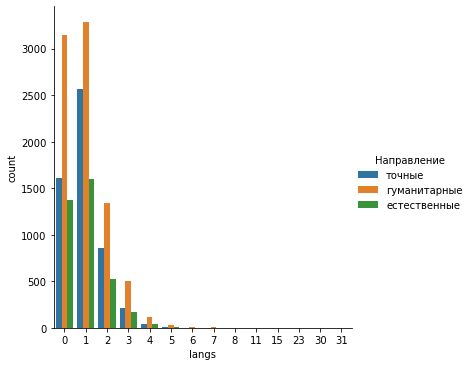

In [99]:
sns.catplot(x='langs',data=cdf,hue='Направление',kind='count')

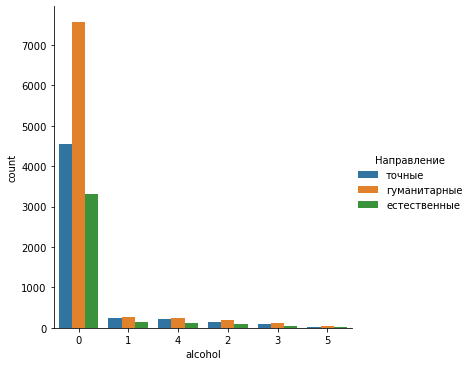

In [100]:
sns.catplot(x='alcohol',data=cdf,hue='Направление',kind='count')

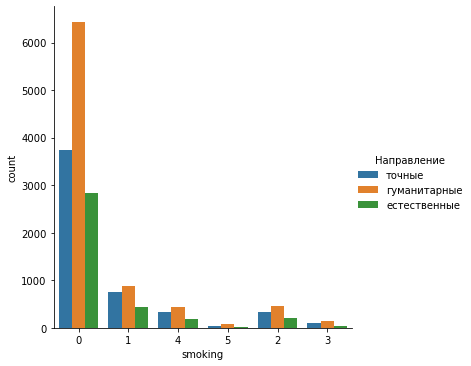

In [101]:
sns.catplot(x='smoking',data=cdf,hue='Направление',kind='count')

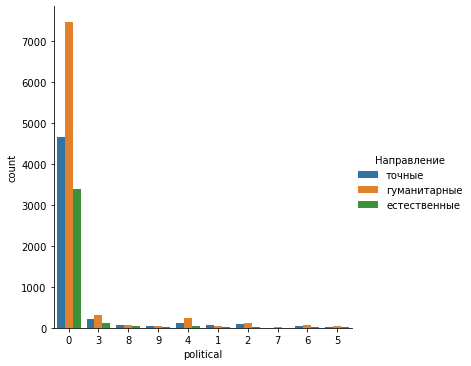

In [102]:
sns.catplot(x='political',data=cdf,hue='Направление',kind='count')

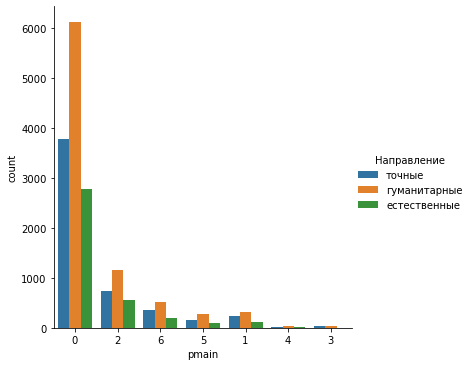

In [103]:
sns.catplot(x='pmain',data=cdf,hue='Направление',kind='count')

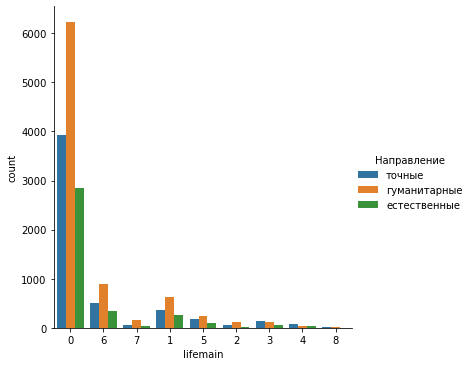

In [104]:
sns.catplot(x='lifemain',data=cdf,hue='Направление',kind='count')

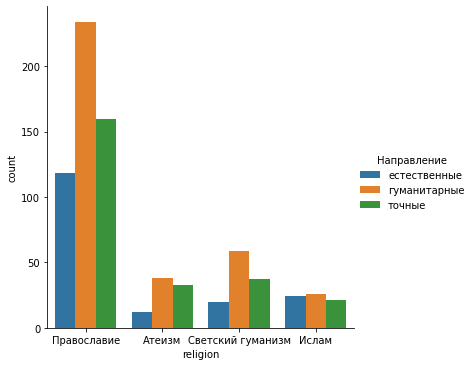

In [105]:
dr= cdf[(cdf['religion'] == '0') | (cdf['religion'] == 'Православие') | (cdf['religion'] == 'Светский гуманизм') | (cdf['religion'] == 'Атеизм') | (cdf['religion'] == 'Ислам')]


sns.catplot(x='religion',data=dr,hue='Направление',kind='count')

In [106]:
cdf.columns

Index(['bdate', 'last_seen', 'maiden_name', 'city_id', 'city_title',
       'country_id', 'home_town', 'education', 'occupation', 'universities',
       'schools', 'career', 'social', 'has_photo', 'phone', 'site', 'status',
       'followers_count', 'relatives', 'relation', 'personal', 'about',
       'universities_faculty_name', 'ПредмОбл Итог', 'Направление',
       'user_items', 'publics', 'groups', 'day', 'month', 'm_name',
       'changecity', 'career_pos', 'social_si', 'phone_si', 'status_q',
       'siblings', 'parents', 'gparents', 'typerel', 'partner', 'langs',
       'alcohol', 'smoking', 'political', 'lifemain', 'pmain', 'religion'],
      dtype='object')

In [107]:
df.columns

Index(['id', 'first_name', 'last_name', 'sex', 'photo_400_orig', 'domain',
       'bdate', 'last_seen', 'maiden_name', 'city_id',
       ...
       '161397364', '55464861', '39009769', '172991045', '22822305',
       '30540715', '39566948', '109349119', '57785652', '66836639'],
      dtype='object', length=3864)

In [108]:
df.iloc[:, 3 : 7].columns

Index(['sex', 'photo_400_orig', 'domain', 'bdate'], dtype='object')

In [109]:
publics = df.iloc[:,34:]

In [110]:
newf = cdf.iloc[:,28 :]

In [111]:
oldf = cdf.iloc[:, 3:7]

In [112]:
sex = df.iloc[:,3]

In [113]:
f = cdf.iloc[:,17]
f

0         41.0
1        209.0
2        236.0
3        146.0
4        291.0
         ...  
17675     45.0
17676     26.0
17677    166.0
17678      8.0
17679     29.0
Name: followers_count, Length: 17471, dtype: float64

In [114]:
df.iloc[:,29:31].columns

Index(['ПредмОбл Итог', 'Направление'], dtype='object')

In [115]:
target = df.iloc[:,29:31]

In [116]:
newdf = pd.concat([f,sex,oldf,newf,target,publics], axis = 1)

In [117]:
c =  pd.concat([sex,oldf,newf], axis = 1)
c.columns

Index(['sex', 'city_id', 'city_title', 'country_id', 'home_town', 'day',
       'month', 'm_name', 'changecity', 'career_pos', 'social_si', 'phone_si',
       'status_q', 'siblings', 'parents', 'gparents', 'typerel', 'partner',
       'langs', 'alcohol', 'smoking', 'political', 'lifemain', 'pmain',
       'religion'],
      dtype='object')

In [118]:
newdf

,followers_count,sex,city_id,city_title,country_id,home_town,day,month,m_name,changecity,...,161397364,55464861,39009769,172991045,22822305,30540715,39566948,109349119,57785652,66836639
0,41.0,2,1.0,Москва,0.0,0,10,10.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,209.0,1,0.0,Майкоп,0.0,0,26,5.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
2,236.0,1,1.0,Москва,0.0,0,14,8.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,146.0,1,0.0,Майкоп,0.0,0,19,9.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,291.0,2,0.0,Майкоп,0.0,0,05,11.0,0.0,1.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17675,45.0,2,2.0,Санкт-Петербург,0.0,0,01,1.0,0.0,1.0,...,0,0,0,0,1,0,0,0,0,0
17676,26.0,2,0.0,Витязево,0.0,0,22,11.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
17677,166.0,2,0.0,Зеленоград,0.0,0,04,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
17678,8.0,2,0.0,NaN,0.0,0,27,2.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0


In [119]:
export = newdf.to_csv('features.csv', header = True)

In [120]:
import pandas as pd

newdf = pd.read_csv('features.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [121]:
df = newdf.iloc[:,1:]

In [122]:
df

,followers_count,sex,city_id,city_title,country_id,home_town,day,month,m_name,changecity,...,161397364,55464861,39009769,172991045,22822305,30540715,39566948,109349119,57785652,66836639
0,41.0,2,1.0,Москва,0.0,0,10.0,10.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,209.0,1,0.0,Майкоп,0.0,0,26.0,5.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
2,236.0,1,1.0,Москва,0.0,0,14.0,8.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,146.0,1,0.0,Майкоп,0.0,0,19.0,9.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,291.0,2,0.0,Майкоп,0.0,0,5.0,11.0,0.0,1.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17675,45.0,2,2.0,Санкт-Петербург,0.0,0,1.0,1.0,0.0,1.0,...,0,0,0,0,1,0,0,0,0,0
17676,26.0,2,0.0,Витязево,0.0,0,22.0,11.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
17677,166.0,2,0.0,Зеленоград,0.0,0,4.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
17678,8.0,2,0.0,NaN,0.0,0,27.0,2.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0


In [123]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [5]:
f = df.iloc[:,:26]

In [6]:
publics = df.iloc[:,28:]

In [7]:
X = pd.concat([f,publics], axis = 1)
y = newdf['Направление']

In [10]:
X

,followers_count,sex,city_id,city_title,country_id,home_town,day,month,m_name,changecity,...,161397364,55464861,39009769,172991045,22822305,30540715,39566948,109349119,57785652,66836639
0,41.0,2,1.0,Москва,0.0,0,10.0,10.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,209.0,1,0.0,Майкоп,0.0,0,26.0,5.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
2,236.0,1,1.0,Москва,0.0,0,14.0,8.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,146.0,1,0.0,Майкоп,0.0,0,19.0,9.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,291.0,2,0.0,Майкоп,0.0,0,5.0,11.0,0.0,1.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17675,45.0,2,2.0,Санкт-Петербург,0.0,0,1.0,1.0,0.0,1.0,...,0,0,0,0,1,0,0,0,0,0
17676,26.0,2,0.0,Витязево,0.0,0,22.0,11.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
17677,166.0,2,0.0,Зеленоград,0.0,0,4.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
17678,8.0,2,0.0,NaN,0.0,0,27.0,2.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0


In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17680 entries, 0 to 17679
Columns: 3856 entries, followers_count to 66836639
dtypes: float64(20), int64(3831), object(5)
memory usage: 520.1+ MB


In [12]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [13]:
X_train

,followers_count,sex,city_id,city_title,country_id,home_town,day,month,m_name,changecity,...,161397364,55464861,39009769,172991045,22822305,30540715,39566948,109349119,57785652,66836639
6157,88.0,2,0.0,Власиха,0.0,0,22.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3169,224.0,1,0.0,Калуга,0.0,0,17.0,11.0,0.0,1.0,...,0,0,0,0,0,1,0,0,0,0
5294,NaN,1,627.0,Симферополь,0.0,0,18.0,10.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
14780,380.0,1,2.0,Санкт-Петербург,0.0,0,23.0,3.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
13837,44.0,2,153.0,Хабаровск,0.0,0,11.0,12.0,0.0,1.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,126.0,1,49.0,Yekaterinburg,0.0,Екатеринбург,4.0,9.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
11964,241.0,1,0.0,NaN,0.0,0,NaN,NaN,0.0,0.0,...,1,0,1,0,0,0,0,0,0,0
5390,NaN,2,147.0,Тюмень,0.0,0,15.0,11.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
860,48.0,2,0.0,NaN,0.0,0,15.0,5.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14144 entries, 6157 to 15795
Columns: 3856 entries, followers_count to 66836639
dtypes: float64(20), int64(3831), object(5)
memory usage: 416.2+ MB


In [88]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

try:
    from sklearn.compose import ColumnTransformer
except ImportError:
    from future_encoders import ColumnTransformer
    
try:
    from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median"))
    ])

In [89]:
from sklearn.base import TransformerMixin
import numpy as np
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].value_counts().index[0] for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [90]:
cat_pipeline = Pipeline([
        ('imputer',DataFrameImputer()),
        ('one-hot',OneHotEncoder(handle_unknown='ignore'))])

In [91]:
X_train.columns

Index(['followers_count', 'sex', 'city_id', 'city_title', 'country_id',
       'home_town', 'day', 'month', 'm_name', 'changecity',
       ...
       '161397364', '55464861', '39009769', '172991045', '22822305',
       '30540715', '39566948', '109349119', '57785652', '66836639'],
      dtype='object', length=3856)

In [92]:
prob = ['typerel','alcohol', 'smoking', 'political',
       'lifemain', 'pmain']
for c in prob:
    X_train[c] = X_train[c].astype(float)
    X_test[c] = X_test[c].astype(float)

<ipython-input-92-039c56fcfcd2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[c] = X_train[c].astype(float)
<ipython-input-92-039c56fcfcd2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[c] = X_test[c].astype(float)


In [93]:
num = ['followers_count','siblings']
cat = ['sex', 'city_id', 'country_id', 'month', 'm_name', 'changecity', 'career_pos',
       'social_si', 'phone_si', 'status_q', 'siblings', 'parents', 'gparents',
       'typerel', 'partner', 'langs', 'alcohol', 'smoking', 'political',
       'lifemain', 'pmain'] 

In [94]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num),
        ("cat", cat_pipeline, cat),
    ])

X_res = full_pipeline.fit_transform(X_train.iloc[:,:26])

In [95]:
X_res

<14144x159 sparse matrix of type '<class 'numpy.float64'>'
	with 315422 stored elements in Compressed Sparse Row format>

In [18]:
clf = LogisticRegression(random_state=0,verbose = 1 ,max_iter  = 500).fit(X_train.iloc[:,28:], y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.7min finished


In [19]:
clf.score(X_train.iloc[:,28:], y_train)

0.8666572398190046

In [102]:
X_rest = full_pipeline.transform(X_test.iloc[:,:26])

In [21]:
clf.score(X_test.iloc[:,28:], y_test)

0.579185520361991

In [107]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=20, n_estimators = 30, random_state=0,verbose = 5)
rfc.fit(X_res, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 30
building tree 2 of 30


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s


building tree 3 of 30
building tree 4 of 30


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s


building tree 5 of 30
building tree 6 of 30
building tree 7 of 30
building tree 8 of 30
building tree 9 of 30
building tree 10 of 30
building tree 11 of 30
building tree 12 of 30
building tree 13 of 30
building tree 14 of 30
building tree 15 of 30
building tree 16 of 30
building tree 17 of 30
building tree 18 of 30
building tree 19 of 30
building tree 20 of 30
building tree 21 of 30
building tree 22 of 30
building tree 23 of 30
building tree 24 of 30
building tree 25 of 30
building tree 26 of 30
building tree 27 of 30
building tree 28 of 30
building tree 29 of 30
building tree 30 of 30


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    4.1s finished


RandomForestClassifier(max_depth=20, n_estimators=30, random_state=0, verbose=5)

In [108]:
rfc.score(X_res, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.1s finished


0.7227799773755657

In [109]:
rfc.score(X_rest, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished


0.5608031674208145

In [76]:


import xgboost

xgb = xgboost.XGBClassifier(max_depth = 30, n_estimators = 20,verbosity = 2)
xgb.fit(X_train.iloc[:,28:], y_train)

[15:13:20] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 978 extra nodes, 0 pruned nodes, max_depth=30
[15:13:26] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 158 extra nodes, 0 pruned nodes, max_depth=30
[15:13:34] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 778 extra nodes, 0 pruned nodes, max_depth=30
[15:13:42] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 1052 extra nodes, 0 pruned nodes, max_depth=30
[15:13:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavi

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=30,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=20, n_jobs=2, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=2)

In [77]:
xgb.score(X_train.iloc[:,28:], y_train)

0.8977658371040724

In [78]:
xgb.score(X_test.iloc[:,28:], y_test)

0.6798642533936652

In [79]:
from sklearn.metrics import classification_report

In [83]:
y_pred = xgb.predict(X_test.iloc[:,28:])
print(classification_report(y_test, y_pred))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

C:\Users\Admin\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

гуманитарные       0.67      0.86      0.75      1729
      другое       0.00      0.00      0.00        34
естественные       0.73      0.50      0.59       720
      точные       0.66      0.53      0.59      1053

    accuracy                           0.68      3536
   macro avg       0.52      0.47      0.49      3536
weighted avg       0.68      0.68      0.67      3536

[[1482    0   75  172]
 [  22    0    1   11]
 [ 259    0  360  101]
 [ 434    0   57  562]]


In [110]:
y_pred = rfc.predict(X_rest)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished


              precision    recall  f1-score   support

гуманитарные       0.57      0.80      0.67      1729
      другое       0.97      1.00      0.99        34
естественные       0.21      0.01      0.01       720
      точные       0.53      0.53      0.53      1053

    accuracy                           0.56      3536
   macro avg       0.57      0.58      0.55      3536
weighted avg       0.49      0.56      0.50      3536

[[1391    0   16  322]
 [   0   34    0    0]
 [ 553    1    5  161]
 [ 497    0    3  553]]


In [85]:
y_pred = clf.predict(X_test.iloc[:,28:])
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

гуманитарные       0.66      0.70      0.68      1729
      другое       0.00      0.00      0.00        34
естественные       0.48      0.45      0.47       720
      точные       0.51      0.49      0.50      1053

    accuracy                           0.58      3536
   macro avg       0.41      0.41      0.41      3536
weighted avg       0.57      0.58      0.57      3536

[[1204    2  213  310]
 [  18    0    7    9]
 [ 214    1  327  178]
 [ 402    2  132  517]]


In [264]:
new = pd.DataFrame()

new['y_pred1'] = rfc.predict(X_res)
new['y_pred2'] = xgb.predict(X_train.iloc[:,28:])
new['sex'] = X_train['sex']
new['city_id'] = X_train['city_id']

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.1s finished
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [265]:
newt = pd.DataFrame()

newt['y_pred1'] = rfc.predict(X_rest)
newt['y_pred2'] = xgb.predict(X_test.iloc[:,28:])
newt['sex'] = X_test['sex']
newt['city_id'] = X_test['city_id']

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished


In [266]:
newt = newt.replace({'точные': 0,'гуманитарные': 1, 'естественные': 2, 'другое': 3})

In [267]:
new = new.replace({'точные': 0,'гуманитарные': 1, 'естественные': 2, 'другое': 3})

In [271]:
new['sex'].fillna(new['sex'].value_counts().index[0], inplace = True)
newt['sex'].fillna(newt['sex'].value_counts().index[0], inplace = True)
new['city_id'].fillna(new['city_id'].value_counts().index[0], inplace = True)
newt['city_id'].fillna(newt['city_id'].value_counts().index[0], inplace = True)

In [283]:

rfc1 = RandomForestClassifier(max_depth=6, n_estimators = 55, random_state=0,verbose = 5)
rfc1.fit(new, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 55
building tree 2 of 55
building tree 3 of 55
building tree 4 of 55
building tree 5 of 55
building tree 6 of 55
building tree 7 of 55
building tree 8 of 55
building tree 9 of 55
building tree 10 of 55
building tree 11 of 55
building tree 12 of 55
building tree 13 of 55
building tree 14 of 55
building tree 15 of 55
building tree 16 of 55
building tree 17 of 55
building tree 18 of 55
building tree 19 of 55
building tree 20 of 55
building tree 21 of 55
building tree 22 of 55
building tree 23 of 55
building tree 24 of 55
building tree 25 of 55
building tree 26 of 55
building tree 27 of 55
building tree 28 of 55
building tree 29 of 55
building tree 30 of 55
building tree 31 of 55
building tree 32 of 55
building tree 33 of 55
building tree 34 of 55
building tree 35 of 55
building tree 36 of 55
building tree 37 of 55
building tree 38 of 55
building tree 39 of 55
building tree 40 of 55
building tree 41 of 55
building tree 42 of 55
building tree 43 of 55
building tree 44 of 

[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.7s finished


RandomForestClassifier(max_depth=6, n_estimators=55, random_state=0, verbose=5)

In [284]:
rfc1.score(new, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.1s finished


0.9169966063348416

In [285]:
rfc1.score(newt,y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.0s finished


0.6860859728506787

In [286]:
y_pred = rfc1.predict(newt)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.0s finished


              precision    recall  f1-score   support

гуманитарные       0.68      0.85      0.76      1729
      другое       0.97      1.00      0.99        34
естественные       0.71      0.51      0.59       720
      точные       0.67      0.53      0.59      1053

    accuracy                           0.69      3536
   macro avg       0.76      0.72      0.73      3536
weighted avg       0.69      0.69      0.68      3536

[[1468    0   89  172]
 [   0   34    0    0]
 [ 254    1  364  101]
 [ 434    0   59  560]]
